# <center> 1. Загрузка данных.

In [408]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import requests
from bs4 import BeautifulSoup
import category_encoders as ce
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
nltk.downloader.download('vader_lexicon')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor  
from sklearn import metrics 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Олег\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [409]:
hotels = pd.read_csv('F:\IDE\SkillFactory\Project-3\hotels.csv')
hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [410]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

Как видим, исходная таблица содержит 17 признаков, 9 из которых представлены в числовом формате, а 8 - в строковом. В двух признаках имеются пропуски.

# <center> 2. Очистка данных.

## 2.1. Заполнение пропусков.

Как уже было сказано, в двух столбцах ('lat' и 'lng') есть пропуски. Рассмотрим подробнее пропущенные данные.

In [411]:
# Создадим отдельную таблицу, где будут пропущенные данные.
lacuna_table = hotels[hotels['lat'].isnull() & hotels['lng'].isnull()]
lacuna_table

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
122,Savoyenstra e 2 16 Ottakring 1160 Vienna Austria,86,8/26/2016,8.3,Austria Trend Hotel Schloss Wilhelminenberg Wien,United States of America,Not much,3,1558,Bugs in our room Bad Wifi,7,3,2.5,"[' Leisure trip ', ' Couple ', ' Classic Room ...",342 day,NaN,NaN
566,23 Rue Damr mont 18th arr 75018 Paris France,21,6/23/2016,8.3,Holiday Inn Paris Montmartre,United Kingdom,N a,3,298,Great location friendly and very helpful staff,8,2,7.1,"[' Leisure trip ', ' Family with older childre...",406 day,NaN,NaN
724,Josefst dter Stra e 10 12 08 Josefstadt 1080 V...,333,8/6/2015,8.3,Fleming s Selection Hotel Wien City,United Arab Emirates,The bed so comfortable and room design,8,3672,Lovely location and friendly staff Close the ...,13,4,9.6,"[' Leisure trip ', ' Solo traveler ', ' Superi...",728 day,NaN,NaN
754,W hringer Stra e 33 35 09 Alsergrund 1090 Vien...,214,1/4/2016,7.8,Hotel Atlanta,Romania,No Negative,0,2724,location near the city centre quiet clean,8,26,8.8,"[' Leisure trip ', ' Family with older childre...",577 day,NaN,NaN
1137,4 rue de la P pini re 8th arr 75008 Paris France,172,1/5/2016,8.8,Maison Albar Hotel Paris Op ra Diamond,Luxembourg,The breakfast was to minimalist for this price,9,1524,No Positive,0,1,8.8,"[' Leisure trip ', ' Couple ', ' Executive Dou...",576 day,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386092,Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Au...,211,3/19/2017,8.6,Hotel City Central,India,Room could have been bigger slightly cramped ...,11,2923,Friendly and very helpful staff,7,2,8.8,"[' Business trip ', ' Solo traveler ', ' Singl...",137 day,NaN,NaN
386465,Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Au...,211,7/4/2017,8.6,Hotel City Central,United Kingdom,Very expensive parking We thought it was 24 f...,24,2923,Central location and excellent breakfast,6,10,9.2,"[' Leisure trip ', ' Couple ', ' Standard Twin...",30 days,NaN,NaN
386504,4 rue de la P pini re 8th arr 75008 Paris France,172,7/10/2017,8.8,Maison Albar Hotel Paris Op ra Diamond,Bangladesh,The rooms were a little small,7,1524,The staff were extremely helpful and friendly...,20,4,9.2,"[' Leisure trip ', ' Family with young childre...",24 days,NaN,NaN
386702,Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Au...,211,11/7/2016,8.6,Hotel City Central,Italy,No Negative,0,2923,Great location close to a metro station and c...,19,6,10.0,"[' Business trip ', ' Solo traveler ', ' Stand...",269 day,NaN,NaN


Всего получилось 2448 строк с пропущенными даннми. Пропуски представляют собой географические широту и долготу отеля. Нам кажется целесообразным заполнить данные лакуны по адресу отеля. Выясним, рядом с какими адресами пропущены данные.

In [412]:
# Считаем уникальные значения адресов отелей с пропущенными данными.
print(f"Всего адресов без координат {lacuna_table['hotel_address'].nunique()}:")
lacuna_table['hotel_address'].value_counts()

Всего адресов без координат 17:


hotel_address
Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria    496
Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria            421
W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria       285
4 rue de la P pini re 8th arr 75008 Paris France               224
Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria         182
W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria          172
Savoyenstra e 2 16 Ottakring 1160 Vienna Austria               141
Bail n 4 6 Eixample 08010 Barcelona Spain                      113
Sieveringer Stra e 4 19 D bling 1190 Vienna Austria            112
Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria             63
23 Rue Damr mont 18th arr 75018 Paris France                    47
Hasenauerstra e 12 19 D bling 1190 Vienna Austria               44
Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria        40
Paragonstra e 1 11 Simmering 1110 Vienna Austria                34
20 Rue De La Ga t 14th arr 75014 Paris France   

Поскольку адресов получилось немного (всего 17), считаем возможным произвести заполнение пропусков "вручную". Для этого воспользуемся сервисом "Яндекс.Карты"

In [413]:
# Составим список lacuna_filling, в который будем вносить
# полученные с помощью сервиса "Яндекс.Карты" координаты
# Данные в списке - кортежи(адрес, широта, долгота):
lacuna_filling = [('Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria', 48.209333, 16.354036),
                  ('Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria', 48.213590, 16.379881),
                  ('W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria', 48.220662, 16.355555),
                  ('4 rue de la P pini re 8th arr 75008 Paris France', 48.875260, 2.323403),
                  ('Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria', 48.188578, 16.382747),
                  ('W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria', 48.216700, 16.359983),
                  ('Savoyenstra e 2 16 Ottakring 1160 Vienna Austria', 48.220050, 16.284974),
                  ('Bail n 4 6 Eixample 08010 Barcelona Spain', 41.500915, 2.034226),
                  ('Sieveringer Stra e 4 19 D bling 1190 Vienna Austria', 48.245935, 16.341397),
                  ('Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria', 48.220920, 16.366712),
                  ('23 Rue Damr mont 18th arr 75018 Paris France', 48.888887, 2.333167),
                  ('Hasenauerstra e 12 19 D bling 1190 Vienna Austria', 48.233495, 16.345556),
                  ('Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria', 48.209477, 16.351350),
                  ('Paragonstra e 1 11 Simmering 1110 Vienna Austria', 48.186409, 16.420170),
                  ('20 Rue De La Ga t 14th arr 75014 Paris France', 48.839813, 2.323573),
                  ('Sep lveda 180 Eixample 08011 Barcelona Spain', 41.379389, 2.157475),
                  ('Pau Clar s 122 Eixample 08009 Barcelona Spain', 41.392967, 2.166718)]

# Теперь преобразуем список в дата-фрейм:
lacuna_filling_table = pd.DataFrame(lacuna_filling, columns = ['hotel_address', 'Lat', 'Lng'])
lacuna_filling_table

,hotel_address,Lat,Lng
0,Josefst dter Stra e 10 12 08 Josefstadt 1080 V...,48.209333,16.354036
1,Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Au...,48.213590,16.379881
2,W hringer Stra e 33 35 09 Alsergrund 1090 Vien...,48.220662,16.355555
3,4 rue de la P pini re 8th arr 75008 Paris France,48.875260,2.323403
4,Landstra er G rtel 5 03 Landstra e 1030 Vienna...,48.188578,16.382747
5,W hringer Stra e 12 09 Alsergrund 1090 Vienna ...,48.216700,16.359983
6,Savoyenstra e 2 16 Ottakring 1160 Vienna Austria,48.220050,16.284974
7,Bail n 4 6 Eixample 08010 Barcelona Spain,41.500915,2.034226
8,Sieveringer Stra e 4 19 D bling 1190 Vienna Au...,48.245935,16.341397
9,Gr nentorgasse 30 09 Alsergrund 1090 Vienna Au...,48.220920,16.366712


Полученную таблицу соединим с исходной.

In [414]:
# Соединяем исходную таблицу с заполненными координатами:
hotels = hotels.merge(lacuna_filling_table, how = 'left', on = 'hotel_address')
hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,Lat,Lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671,NaN,NaN
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097,NaN,NaN
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643,NaN,NaN
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540,NaN,NaN
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060,NaN,NaN


In [415]:
# Заполняем пропуски из образовавшихся новых столбцов:
hotels['lat'] = hotels['lat']. fillna(hotels['Lat'])
hotels['lng'] = hotels['lng']. fillna(hotels['Lng'])

# Проверяем результат:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 19 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

Пропуски заполнены. Образовавшиеся в результате объединения таблиц дополнительные столбцы можно удалить.

In [416]:
# Удаляем дополнительные столбцы:
hotels.drop(['Lat', 'Lng'], axis = 1, inplace = True)

## 2.2. Удаление дубликатов.

Проверим наши данные на содержание дубликатов.

In [417]:
dupl = hotels[hotels.duplicated()]
dupl

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
21413,9 Rue Sainte Beuve 6th arr 75006 Paris France,22,9/27/2015,8.9,Hotel Le Sainte Beuve,Costa Rica,No Negative,0,143,Ir s a lovely boutique hotel full of Parisian...,53,4,10.0,"[' Leisure trip ', ' Family with older childre...",676 day,48.843900,2.329486
53110,7 rue Casimir Delavigne 6th arr 75006 Paris Fr...,44,9/25/2016,9.0,H tel Baume,Lebanon,nothing at all,4,253,bed was great staff are wonderful location ve...,10,1,10.0,"[' Leisure trip ', ' Couple ', ' Classic Doubl...",312 day,48.850152,2.339278
54461,40 Rue du Commandant Ren Mouchotte 14th arr 75...,228,8/2/2016,7.9,H tel Concorde Montparnasse,Israel,The room to far from elevator,7,2515,Staff very nice and helpful Breakfast was per...,17,2,8.3,"[' Couple ', ' Classic Twin Room ', ' Stayed 3...",366 day,48.838108,2.318669
56542,7 rue Casimir Delavigne 6th arr 75006 Paris Fr...,44,7/2/2017,9.0,H tel Baume,Romania,Breakfast was a huge joke It was the worst po...,19,253,Room was great nice and spacious appartment f...,14,7,7.9,"[' Leisure trip ', ' Family with young childre...",32 days,48.850152,2.339278
65789,7 rue Casimir Delavigne 6th arr 75006 Paris Fr...,44,8/11/2015,9.0,H tel Baume,United Kingdom,No Negative,0,253,Friendly reception staff clean bathroom and l...,11,1,10.0,"[' Leisure trip ', ' Couple ', ' Superior Doub...",723 day,48.850152,2.339278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383104,7 rue Casimir Delavigne 6th arr 75006 Paris Fr...,44,11/3/2015,9.0,H tel Baume,United States of America,Rooms are very small,6,253,Location is excellent and staff is very frien...,10,1,8.3,"[' Leisure trip ', ' Couple ', ' Classic Doubl...",639 day,48.850152,2.339278
383183,40 Rue du Commandant Ren Mouchotte 14th arr 75...,228,7/28/2016,7.9,H tel Concorde Montparnasse,France,A bit noisy old fashion At almost 20 the brea...,18,2515,Convenient if one arrives departs from the Mo...,10,48,6.7,"[' Business trip ', ' Solo traveler ', ' Class...",371 day,48.838108,2.318669
383798,40 Rue du Commandant Ren Mouchotte 14th arr 75...,228,5/15/2017,7.9,H tel Concorde Montparnasse,United Kingdom,twice spoken to staff to replace the coffee w...,24,2515,Tea making facilities not in the room only co...,11,2,7.9,"[' Leisure trip ', ' Couple ', ' Superior Doub...",80 days,48.838108,2.318669
384118,40 Rue du Commandant Ren Mouchotte 14th arr 75...,228,10/12/2015,7.9,H tel Concorde Montparnasse,Australia,No great restaurants within a short walk but ...,12,2515,The Hotel was wonderfully p laced for us to a...,44,24,10.0,"[' Leisure trip ', ' Couple ', ' Classic Doubl...",661 day,48.838108,2.318669


Итак, в наших данных есть 307 повторяющихся строк. Удалим их.

In [418]:
hotels = hotels.drop_duplicates(ignore_index = True)
hotels

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386491,9 Knaresborough Place Kensington and Chelsea L...,107,4/19/2017,9.0,Hotel Moonlight,France,No Negative,0,617,Tr s proche du metro Earl s court,10,10,8.8,"[' Leisure trip ', ' Group ', ' Club Double or...",106 day,51.494028,-0.191050
386492,Landstra er Hauptstra e 155 03 Landstra e 1030...,272,2/13/2017,8.4,BEST WESTERN PLUS Amedia Wien,Turkey,No Negative,0,3224,The bed was so comfy I stayed with my boyfrie...,93,1,9.2,"[' Leisure trip ', ' Couple ', ' Standard Doub...",171 day,48.192379,16.399451
386493,29 31 Gower Street Camden London WC1E 6HG Unit...,457,2/7/2016,6.8,Bloomsbury Palace Hotel,Netherlands,room is really small but guess is normal in L...,12,2751,great location simple check in out nice shower,9,21,8.3,"[' Business trip ', ' Solo traveler ', ' Singl...",543 day,51.520795,-0.131084
386494,31 Great Cumberland Place Westminster Borough ...,365,5/21/2017,8.1,The Marble Arch London,United Arab Emirates,No Negative,0,1567,Location and very comfy bed,6,28,9.2,"[' Leisure trip ', ' Solo traveler ', ' Deluxe...",74 days,51.515125,-0.160066


Наши данные очищены от дубликатов, пропуски заполнены. Можно приступать к преобразованию признаков.

# <center> 3. Преобразование данных.

## <center> 3.1. Строковые значения.

Нашими задачами на данном этапе будут:

1. Проанализировать все признаки, представленные строковыми значениями и создать на их базе (при возможности) новых значимых признаков.
2. Избавиться от строковых значений.
3. Проанализировать и при необходмости преобразовать все оставшиеся числовые признаки (методами нормализации или стандартизации).

Работу на данном этапе мы будем выполнять в следующей последовательности:

1. Проанализируем все строковые данные по порядку. На основе анализа примем решение о необходмости создания новых признаков на основе строковых данных.
2. Удалим строковые данные.
3. По порядку проведём анализ всех числовых данных и примем решение о необходимости их преобразования.

### 3.1.1. Адрес отеля.

Проанализируем признак 'hotel_address'.

In [419]:
print(f"Всего количество адресов в базе: {hotels['hotel_address'].nunique()}")

Всего количество адресов в базе: 1493


Посмотрим на структуру записи в адресе.

In [420]:
hotels['hotel_address'].value_counts()

hotel_address
163 Marsh Wall Docklands Tower Hamlets London E14 9SJ United Kingdom              3587
372 Strand Westminster Borough London WC2R 0JJ United Kingdom                     3206
Westminster Bridge Road Lambeth London SE1 7UT United Kingdom                     3095
Scarsdale Place Kensington Kensington and Chelsea London W8 5SY United Kingdom    2688
7 Pepys Street City of London London EC3N 4AF United Kingdom                      2379
                                                                                  ... 
Via Palmanova 153 20132 Milan Italy                                                  7
40 Rue Rene Boulanger 10th arr 75010 Paris France                                    7
Via M Buonarroti 13 Fiera Milano City 20149 Milan Italy                              6
Johann Staud Stra e 32 16 Ottakring 1160 Vienna Austria                              6
13 Rue Fran ois Ory 92120 Paris France                                               5
Name: count, Length: 1493, dt

Как видно, записи стандартны: на последнем месте пишется название страны, на предпоследнем - город. На основании этого определим, отели из каких городов представлены в нашей базе данных.

In [421]:
# Вначале выделим признак 'location'. разделив запси в адресе по пробелу.
# Данный признак поможет нам в дальнейшей работе с адресом:
hotels['location'] = hotels['hotel_address'].apply(
    lambda x: x.split(' '))
hotels['location']

0         [Stratton, Street, Mayfair, Westminster, Borou...
1         [130, 134, Southampton, Row, Camden, London, W...
2         [151, bis, Rue, de, Rennes, 6th, arr, 75006, P...
3         [216, Avenue, Jean, Jaures, 19th, arr, 75019, ...
4          [Molenwerf, 1, 1014, AG, Amsterdam, Netherlands]
                                ...                        
386491    [9, Knaresborough, Place, Kensington, and, Che...
386492    [Landstra, er, Hauptstra, e, 155, 03, Landstra...
386493    [29, 31, Gower, Street, Camden, London, WC1E, ...
386494    [31, Great, Cumberland, Place, Westminster, Bo...
386495    [25, Courtfield, Gardens, Kensington, and, Che...
Name: location, Length: 386496, dtype: object

In [422]:
# Теперь из признака 'location' выделим признак 'city'.
# Сразу определим количество уникальных значений в полученном признаке.
hotels['city'] = hotels['location'].apply(
    lambda x: x[-2:]) # В признак 'city' заносим два последних элемента из признака 'location'
hotels['city'].value_counts()

city
[United, Kingdom]           196773
[Barcelona, Spain]           45132
[Paris, France]              44528
[Amsterdam, Netherlands]     43004
[Vienna, Austria]            29177
[Milan, Italy]               27882
Name: count, dtype: int64

Теперь видно, что в таблице представлены отели всего из 5 европейских городов плюс Великобритания. Посмотрим, какие британские города представлены в базе.

In [423]:
# Ищем 5-й элемент справа в тех записях в признаке 'location',
# которые оканчиваются на 'Kingdom':
british_city = hotels['location'].apply(
    lambda x: x[-5] if x[-1] == 'Kingdom' else None)

# Смотрим на получившиеся уникальные значения:
british_city.value_counts()

location
London    196773
Name: count, dtype: int64

Все британские отели в базе данных находятся в Лондоне. Таким образом, у нас данные по отелям из шести городов: Лондона, Барселоны, Парижа, Амстердама, Вены и Милана. На наш взгляд, это безусловно значимый признак. Отели в разных городах, и тем более странах, могут отличаться и по уровню комфорта, и по уровню сервиса. На этом основании мы считаем необходимым создать в нашей таблице новый признак, который будет отмечать местоположение отеля.

Создадим шесть новых признаков: 'London', 'Barcelona', 'Paris', 'Amsterdam', 'Vienna', 'Milan'. Если отель находится в этом городе, значение в признаке будет равно 1, если нет - 0.

In [424]:
# Создаём в таблице новые признаки по значениям в признаке 'city':
hotels['London'] = hotels['city'].apply(lambda x: 1 if x[0] == 'United' else 0)
hotels['Barcelona'] = hotels['city'].apply(lambda x: 1 if x[0] == 'Barcelona' else 0)
hotels['Paris'] = hotels['city'].apply(lambda x: 1 if x[0] == 'Paris' else 0)
hotels['Amsterdam'] = hotels['city'].apply(lambda x: 1 if x[0] == 'Amsterdam' else 0)
hotels['Vienna'] = hotels['city'].apply(lambda x: 1 if x[0] == 'Vienna' else 0)
hotels['Milan'] = hotels['city'].apply(lambda x: 1 if x[0] == 'Milan' else 0)
hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,lat,lng,location,city,London,Barcelona,Paris,Amsterdam,Vienna,Milan
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,51.507894,-0.143671,"[Stratton, Street, Mayfair, Westminster, Borou...","[United, Kingdom]",1,0,0,0,0,0
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,51.521009,-0.123097,"[130, 134, Southampton, Row, Camden, London, W...","[United, Kingdom]",1,0,0,0,0,0
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,...,48.845377,2.325643,"[151, bis, Rue, de, Rennes, 6th, arr, 75006, P...","[Paris, France]",0,0,1,0,0,0
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,...,48.888697,2.394540,"[216, Avenue, Jean, Jaures, 19th, arr, 75019, ...","[Paris, France]",0,0,1,0,0,0
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,...,52.385601,4.847060,"[Molenwerf, 1, 1014, AG, Amsterdam, Netherlands]","[Amsterdam, Netherlands]",0,0,0,1,0,0


Однако, на наш взгляд, это не вся полезная информация, которую можно извлечь из адреса отеля. Немаловажную роль имеет то, в каком районе города располагается тот или ионй отель: в центре города или на его окраине, насколько этот район популярен среди туристов. Информацию о районе города, в котором расположен отель, мы можем извлечь из адреса. Посмотрим на лондонские адреса.

In [425]:
# Создаём маску, в которой только лондонские отели:
london = hotels[hotels['London'] == 1]
# Отображаем адреса:
display(london['hotel_address'].value_counts())

hotel_address
163 Marsh Wall Docklands Tower Hamlets London E14 9SJ United Kingdom              3587
372 Strand Westminster Borough London WC2R 0JJ United Kingdom                     3206
Westminster Bridge Road Lambeth London SE1 7UT United Kingdom                     3095
Scarsdale Place Kensington Kensington and Chelsea London W8 5SY United Kingdom    2688
7 Pepys Street City of London London EC3N 4AF United Kingdom                      2379
                                                                                  ... 
49 50 St John s Square Islington London EC1V 4JJ United Kingdom                     23
24 Egerton Gardens Kensington and Chelsea London SW3 2DB United Kingdom             22
14 Henrietta Street Westminster Borough London WC2E 8QH United Kingdom              22
Halkin Street Westminster Borough London SW1X 7DJ United Kingdom                    21
2 4 Boundary Street Hackney London E2 7DD United Kingdom                             9
Name: count, Length: 399, dty

Итак, информация о районе в лондонских адресах, находится на 6 позиции справа. Создадим список со всеми районами Лондона. в которых находятся наши отели.

In [426]:
# Разделяем адрес по пробелу:
london['district'] = london['hotel_address'].apply(
    lambda x: x.split(' '))

# Создаём в маске временный признак 'district',
# в который заносим 6 элемент справа из 'hotel_address'
london['district'] = london['district'].apply(
    lambda x: x[-6])

# Создаём словарь с извлечёнными районами:
districts_of_london = dict()
k = 0
for elem in london['district']:
    if elem in districts_of_london:
        districts_of_london[elem] += 1
    else:
        districts_of_london[elem] = 1
        
# Отсортируем полученный словарь по убыванию значений:
districts_of_london = {k: v for k, v in sorted(districts_of_london.items(), key=lambda item: -item[1])}
districts_of_london

{'Borough': 68042,
 'Chelsea': 31789,
 'Camden': 21471,
 'London': 13888,
 'Hamlets': 9493,
 'Southwark': 7725,
 'Lambeth': 7451,
 'Fulham': 5597,
 'Islington': 5504,
 'Newham': 5470,
 'Brent': 4943,
 'Greenwich': 4419,
 'Road': 1552,
 'Battersea': 1551,
 'Hackney': 1478,
 'Ealing': 1007,
 'Chiswick': 951,
 'Cricklewood': 835,
 'Way': 707,
 'A40': 516,
 'Common': 508,
 'Street': 490,
 'Wimbledon': 422,
 'Hill': 243,
 'Wandsworth': 218,
 'Lanes': 162,
 'Avenue': 145,
 'Sheen': 124,
 'Cross': 72}

Визуализируем получившуюся информацию.

<AxesSubplot: title={'center': 'Распределение отелей по районам Лондона'}, xlabel='District'>

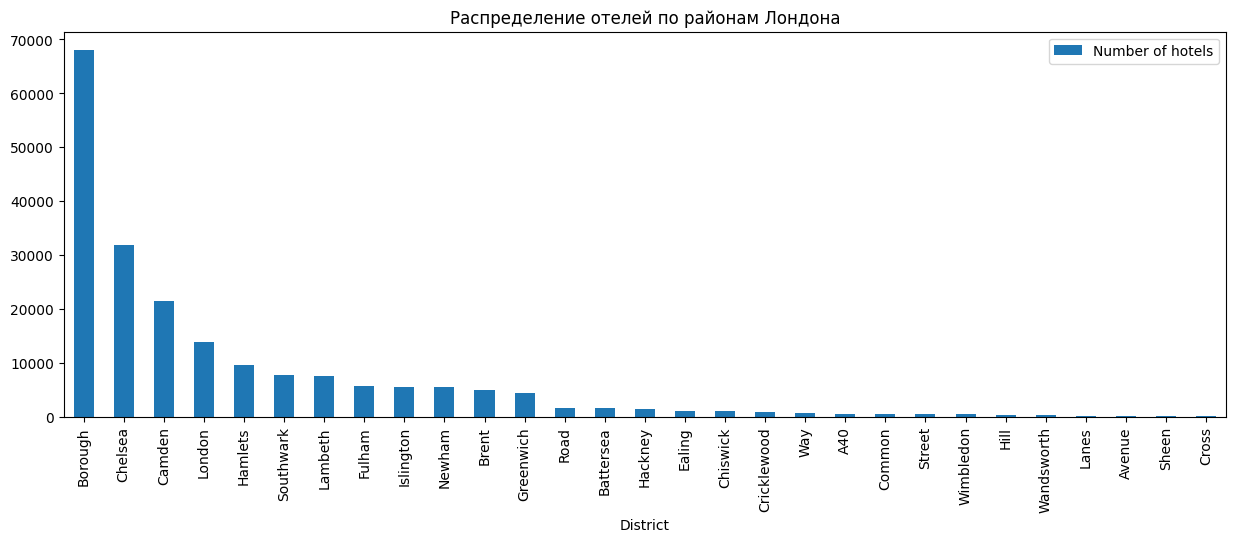

In [427]:
# Создаём временный дата-фрейм по словарю.
districts_of_london_df = pd.DataFrame(list(districts_of_london.items()), columns = ['District', 'Number of hotels'])
# Создаём столбчатую диаграмму по дата-фрейму.
districts_of_london_df.plot(x = 'District', figsize = (15, 5), kind = 'bar', title = 'Распределение отелей по районам Лондона')

Проделаем те же операции с другими городами из нашей базы данных.

<AxesSubplot: title={'center': 'Распределение отелей по районам Барселоны'}, xlabel='District'>

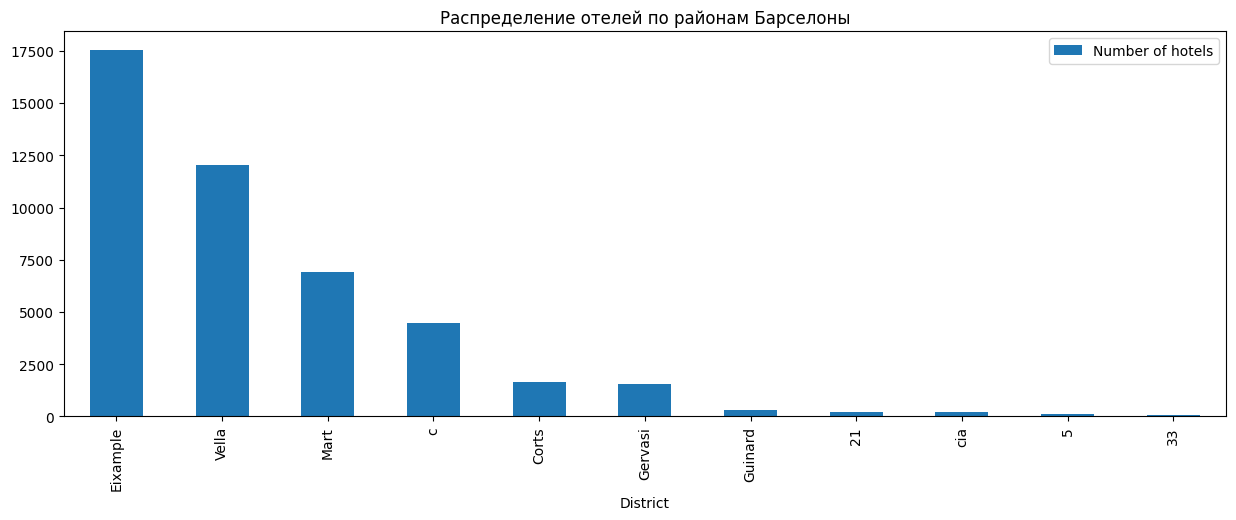

In [428]:
# Выполняем последовательно те же действия, что мы проделали для Лондона,
# теперь для Барселоны.
barcelona = hotels[hotels['Barcelona'] == 1]

barcelona['district'] = barcelona['hotel_address'].apply(
    lambda x: x.split(' '))

barcelona['district'] = barcelona['district'].apply(
    lambda x: x[-4])

districts_of_barcelona = dict()
k = 0
for elem in barcelona['district']:
    if elem in districts_of_barcelona:
        districts_of_barcelona[elem] += 1
    else:
        districts_of_barcelona[elem] = 1

districts_of_barcelona = {k: v for k, v in sorted(districts_of_barcelona.items(), key=lambda item: -item[1])}

districts_of_barcelona_df = pd.DataFrame(list(districts_of_barcelona.items()), columns = ['District', 'Number of hotels'])
districts_of_barcelona_df.plot(x = 'District', figsize = (15, 5), kind = 'bar', title = 'Распределение отелей по районам Барселоны')

<AxesSubplot: title={'center': 'Распределение отелей по районам Парижа'}, xlabel='District'>

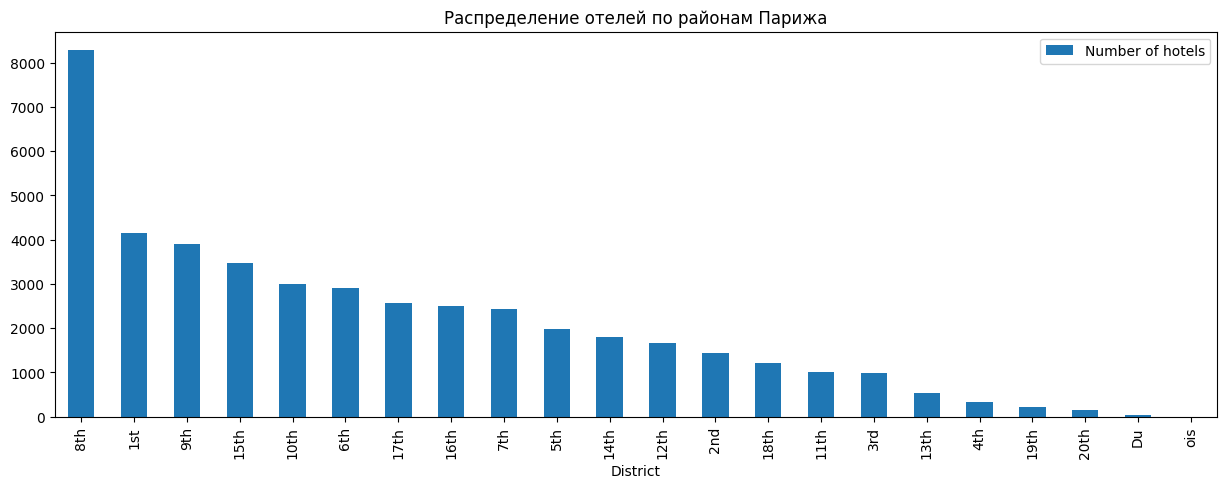

In [429]:
# Для Парижа:
paris = hotels[hotels['Paris'] == 1]

paris['district'] = paris['hotel_address'].apply(
    lambda x: x.split(' '))

paris['district'] = paris['district'].apply(
    lambda x: x[-5])

districts_of_paris = dict()
k = 0
for elem in paris['district']:
    if elem in districts_of_paris:
        districts_of_paris[elem] += 1
    else:
        districts_of_paris[elem] = 1

districts_of_paris = {k: v for k, v in sorted(districts_of_paris.items(), key=lambda item: -item[1])}

districts_of_paris_df = pd.DataFrame(list(districts_of_paris.items()), columns = ['District', 'Number of hotels'])
districts_of_paris_df.plot(x = 'District', figsize = (15, 5), kind = 'bar', title = 'Распределение отелей по районам Парижа')

<AxesSubplot: title={'center': 'Распределение отелей по районам Амстердама'}, xlabel='District'>

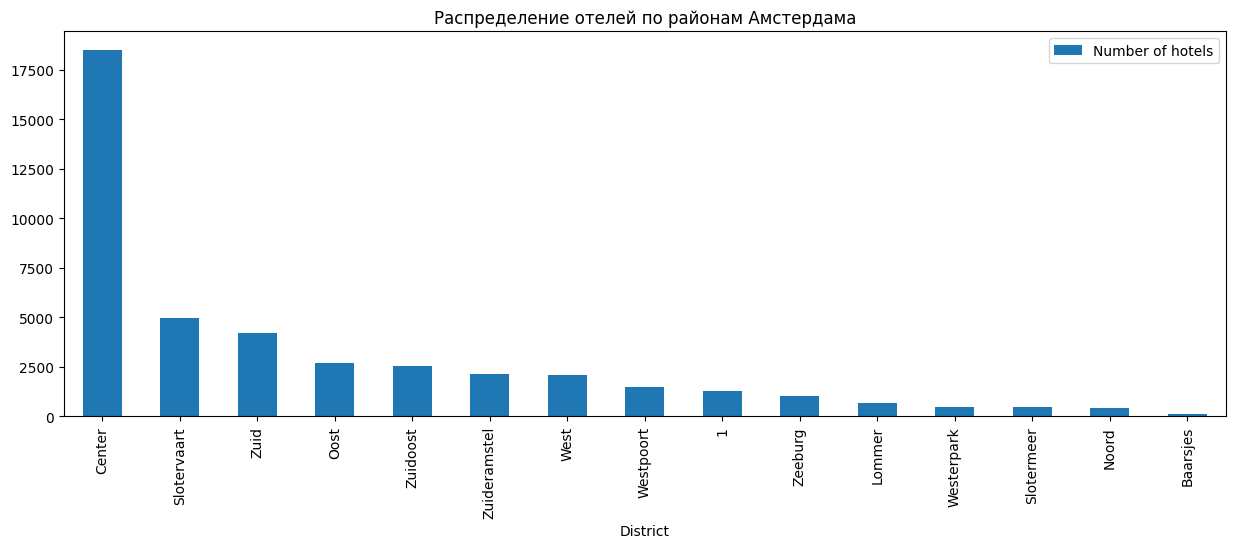

In [430]:
# Для Амстердама:
amsterdam = hotels[hotels['Amsterdam'] == 1]

amsterdam['district'] = amsterdam['hotel_address'].apply(
    lambda x: x.split(' '))

amsterdam['district'] = amsterdam['district'].apply(
    lambda x: x[-5])

districts_of_amsterdam = dict()
k = 0
for elem in amsterdam['district']:
    if elem in districts_of_amsterdam:
        districts_of_amsterdam[elem] += 1
    else:
        districts_of_amsterdam[elem] = 1

districts_of_amsterdam = {k: v for k, v in sorted(districts_of_amsterdam.items(), key=lambda item: -item[1])}

districts_of_amsterdam_df = pd.DataFrame(list(districts_of_amsterdam.items()), columns = ['District', 'Number of hotels'])
districts_of_amsterdam_df.plot(x = 'District', figsize = (15, 5), kind = 'bar', title = 'Распределение отелей по районам Амстердама')

<AxesSubplot: title={'center': 'Распределение отелей по районам Вены'}, xlabel='District'>

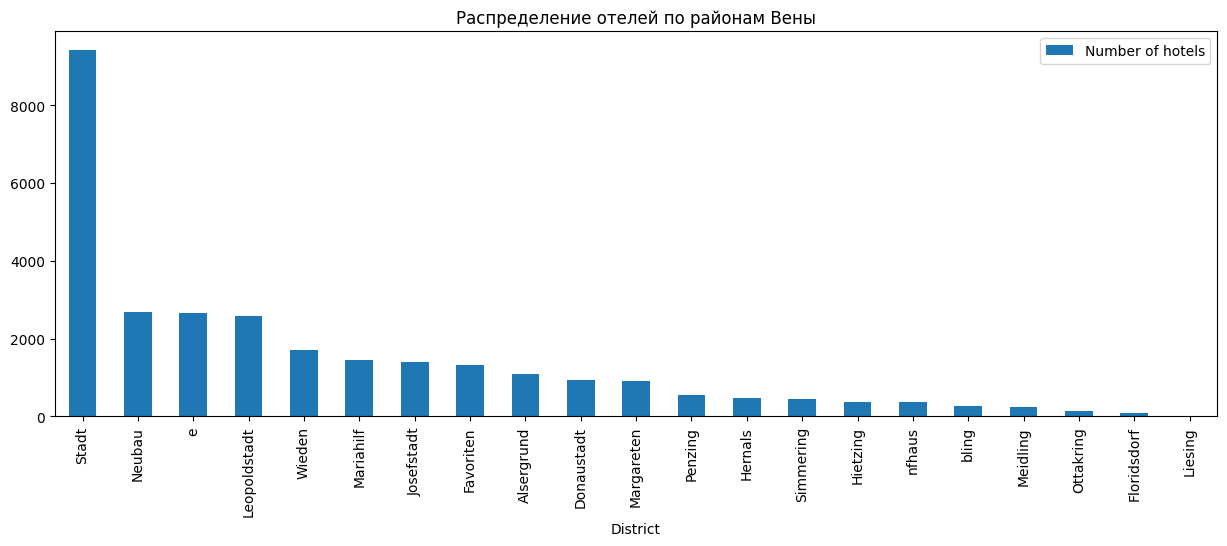

In [431]:
# Для Вены:
vienna = hotels[hotels['Vienna'] == 1]

vienna['district'] = vienna['hotel_address'].apply(
    lambda x: x.split(' '))

vienna['district'] = vienna['district'].apply(
    lambda x: x[-4])

districts_of_vienna = dict()
k = 0
for elem in vienna['district']:
    if elem in districts_of_vienna:
        districts_of_vienna[elem] += 1
    else:
        districts_of_vienna[elem] = 1

districts_of_vienna = {k: v for k, v in sorted(districts_of_vienna.items(), key=lambda item: -item[1])}

districts_of_vienna_df = pd.DataFrame(list(districts_of_vienna.items()), columns = ['District', 'Number of hotels'])
districts_of_vienna_df.plot(x = 'District', figsize = (15, 5), kind = 'bar', title = 'Распределение отелей по районам Вены')

<AxesSubplot: title={'center': 'Распределение отелей по районам Милана'}, xlabel='District'>

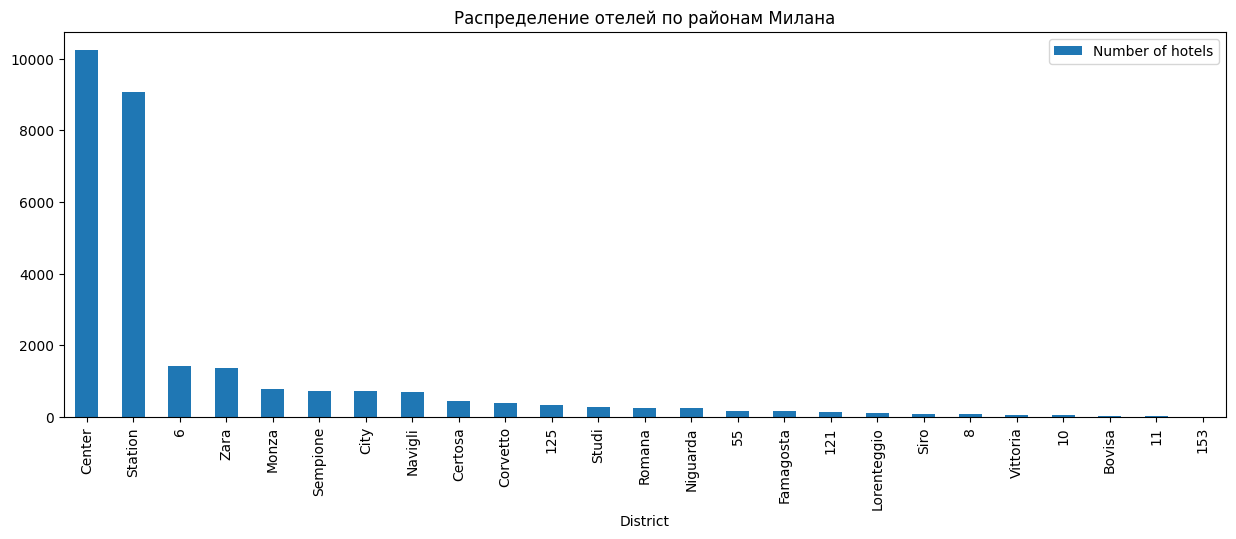

In [432]:
# Для Милана:
milan = hotels[hotels['Milan'] == 1]

milan['district'] = milan['hotel_address'].apply(
    lambda x: x.split(' '))

milan['district'] = milan['district'].apply(
    lambda x: x[-4])

districts_of_milan = dict()
k = 0
for elem in milan['district']:
    if elem in districts_of_milan:
        districts_of_milan[elem] += 1
    else:
        districts_of_milan[elem] = 1

districts_of_milan = {k: v for k, v in sorted(districts_of_milan.items(), key=lambda item: -item[1])}

districts_of_milan_df = pd.DataFrame(list(districts_of_milan.items()), columns = ['District', 'Number of hotels'])
districts_of_milan_df.plot(x = 'District', figsize = (15, 5), kind = 'bar', title = 'Распределение отелей по районам Милана')

Отображение названий районов получилось не совсем корректным, но на данном этапе это неважно. Все районы легко идентифицировать. На данном этапе важно другое: определить, какие районы в том или ином городе расположены в центре города или в наиболее привлекательных для туристов районах. Данную информацию мы извлекли из следующего источника: https://planetofhotels.com/guide/ru/.

Итак, согласно информации сервиса "Planet Hotels", а также полученной нами информации по районам городов, отражённой на графиках, мы считаем целесообразным выделить следующие районы в наших городах:
* Лондон. Лондон условно делится на "Внутренний Лондон" и "Внешний Лондон". К "Внутреннему Лондону" относятся следующие районы: 'Greenwich', 'Islington', 'Camden', 'Chelsea', 'Lambeth', 'Lewisham', 'Southwark', 'Hamlets', 'Wandsworth', 'Hackney', 'Fulham', 'Central London', 'Westminster Borough'. "Внешний Лондон" образуют все остальные районы. Однако из приведённой выше диаграммы следует, что район 'Westminster Borough' выделяется среди прочих своей популярностью, поэтому нам представляется целесообразным выделить его отдельно. Таким образом, все лондонские районы мы разделим на три категории: 'Borough', inner_london и outer_london.
* Барселона. Среди районов Барселоны выделяются Ciutat Vella (Старый город) и Eixample. Из нашей диаграммы следует, что эти районы представлены в наших данных гораздо шире остальных. Таким образом, районы Барселоны мы разделим на три категории: 'Vella', 'Eixample' и other.
* Париж. К центральным округам Парижа относятся 1-й, 4-й и 7-й. Однако из диаграммы следует, что наибольшей популярностью пользуется 8-й округ. По данным сервиса "Planet Hotels", это один из самых дорогих и престижных округов Парижа, поэтому мы считаем, что его нужно выделить отдельно. Итак, округи Парижа мы разделим на три категории: '8th', 'central' и 'other'.
* Амстердам. С Астердамом и Веной всё просто: тут есть центральные районы. Они же наиболее популярные и в нашей базе данных. Поэтому Амстердам разделим на две категории: 'Center' и 'other'.
* Вена. 'Innere Stadt' и 'other'.
* Милан. В Милане есть исторический центр - Старый город. На диаграмме видно, что очень большой популярностью пользуется и другая зона Милана, примыкающая к Старому городу, - Центральный вокзал. Эти две зоны мы и выделим особо. Таким образом, у Милана будет 3 категории: 'Center', 'Station' и 'other'.

Можно приступать к заполнению признаков. Одновременно мы будем производить их кодировку. Делать мы это будем вручную, не прибегая к программным методам. Логика в кодировке будет следующая: чем выше популярность того или иного района, тем более высокое цифровое значение он будет получать. Так, например, районы Лондона будут закодированы так: 'Borough' ('Westminster Borough') - 3, inner_london - 2, outer_london - 1, 0 - если отель находится не в Лондоне.

In [433]:
# Создаём список районов "Внутренненго Лондона":
inner_london = ['Greenwich', 'Islington', 'Camden', 'Chelsea', 'Lambeth', 'Lewisham', 'Southwark', 'Hamlets', 'Wandsworth', 'Hackney', 'Fulham', 'London']
# Кодируем признак 'London' при помощи лямбда-функции:
hotels['London'] = hotels['location'].apply(lambda x: 3 if x[-6] == 'Borough' else
                                            2 if x[-6] in inner_london else
                                            1 if x[-6] not in inner_london and x[-5] == 'London' else 0
                                            )

# Аналогичные операции проделываем и с другими городами:
hotels['Barcelona'] = hotels['location'].apply(lambda x: 3 if x[-4] == 'Vella' else
                                            2 if x[-4] == 'Eixample' else
                                            1 if x[-2] == 'Barcelona' else 0
                                            )

hotels['Paris'] = hotels['location'].apply(lambda x: 3 if x[-5] == '8th' else
                                            2 if x[-5] == '1st' or x[-5] == '4th' or x[-5] == '7th' else
                                            1 if x[-2] == 'Paris' else 0
                                            )

hotels['Amsterdam'] = hotels['location'].apply(lambda x: 2 if x[-5] == 'Center' else
                                            1 if x[-2] == 'Amsterdam' else 0
                                            )

hotels['Vienna'] = hotels['location'].apply(lambda x: 2 if x[-4] == 'Stadt' else
                                            1 if x[-2] == 'Vienna' else 0
                                            )

hotels['Milan'] = hotels['location'].apply(lambda x: 3 if x[-4] == 'Center' else
                                            2 if x[-4] == 'Station' else
                                            1 if x[-2] == 'Milan' else 0
                                            )

# Проверяем результат:
hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,lat,lng,location,city,London,Barcelona,Paris,Amsterdam,Vienna,Milan
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,51.507894,-0.143671,"[Stratton, Street, Mayfair, Westminster, Borou...","[United, Kingdom]",3,0,0,0,0,0
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,51.521009,-0.123097,"[130, 134, Southampton, Row, Camden, London, W...","[United, Kingdom]",2,0,0,0,0,0
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,...,48.845377,2.325643,"[151, bis, Rue, de, Rennes, 6th, arr, 75006, P...","[Paris, France]",0,0,1,0,0,0
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,...,48.888697,2.394540,"[216, Avenue, Jean, Jaures, 19th, arr, 75019, ...","[Paris, France]",0,0,1,0,0,0
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,...,52.385601,4.847060,"[Molenwerf, 1, 1014, AG, Amsterdam, Netherlands]","[Amsterdam, Netherlands]",0,0,0,1,0,0


На наш взгляд, никакой другой полезной информации адрес отеля не представляет, можно удалить данный признак из базы данных. Вместе с ним мы удалим и широиу с долготой, потому что они не представляют никакой информативной ценности. Мы уже произвели дифференциацию отелей в зависимости от их местоположения, которая, на наш взгляд, более информативна, чем широта и долгота.

Признаки 'location' и 'city' нами были введены для извлечения полезной информации из адреса отеля. Больше они не нужны, их удаляем тоже.

Можно ли извлечь полезную информацию из названия отеля? Иногда название бренда работает на пользу этому бренду: некоторые люди склонны больше доверять именно брендовым вещам. С отелями так же: вполне возможно, что некоторые люди больше доверяют тем или иным отелям и психологически склонны ставить таким отелям более высокие баллы, закрывая глаза на недостатки. Но всё это весьма спорное мнение, тем более что нам не представляется возможным зафиксировать это каким-либо образом программными средствами. В связи с этим, мы считаем, что название отеля не представляет для нас никакой ценности, мы удаляем и этот признак из нашей таблицы.

In [434]:
# Удаляем ненужные признаки из таблицы и сразу же проверяем результат.
hotels.drop(['hotel_address', 'lat', 'lng', 'location', 'city', 'hotel_name'], axis = 1, inplace = True)
hotels.head()

,additional_number_of_scoring,review_date,average_score,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,London,Barcelona,Paris,Amsterdam,Vienna,Milan
0,581,2/19/2016,8.4,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,3,0,0,0,0,0
1,299,1/12/2017,8.3,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,2,0,0,0,0,0
2,32,10/18/2016,8.9,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,0,0,1,0,0,0
3,34,9/22/2015,7.5,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,0,0,1,0,0,0
4,914,3/5/2016,8.5,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,0,0,0,1,0,0


### 3.1.2. Дата отзыва.

Будем считать, что отзыв об отеле был составлен в день отъезда или близкий к отъезду день. Следовательно, дата отзыва - это дата путешествия интервьюёра. О чём может говорить эта дата? Гостиничный бизнес напрямую зависит от туристического сезона. В частности, стоимость проживания в гостинице сильно варьируется в течение года. Таким образом, дата отзыва - значимый для нас показатель. Большое значение имеет, в какое время года (точнее: в какой период туристического сезона) путешествовал гость. По данным портала "Allbest" (https://otherreferats.allbest.ru/sport/00187412_0.html), всего по активности туристического потока можно выделить 4 сезона, которые влияют, в том числе, и на ценообразование в гостиницах. В Европе можно выделить следующие туристические сезоны (https://ezdili-znaem.com/kak-deshevo-puteshestvovat-po-evrope/):
* сезон-пик: июль-август;
* высокий сезон: май-июнь, сентябрь;
* низкий сезон: март-апрель, октябрь;
* "мёртвый" сезон: январь-февраль, ноябрь-декабрь.

Исходя из этого, признак "review_date" мы преобразуем в зависимости от того, в какой сезон путешествовал гость.

Сразу же произведём кодировку данного признака, исходя из логики интенсивности сезона: 4 - сезон-пик, 1 - "мёртвый" сезон.

In [435]:
hotels['review_date'] = hotels['review_date'].apply (lambda x: x.split('/'))
hotels['review_date'] = hotels['review_date'].apply (lambda x: 4 if x[0] == '7' or x[0] == '8' else
                                                 3 if x[0] == '5' or x[0] == '6' or x[0] == '9' else
                                                 2 if x[0] == '3' or x[0] == '4' or x[0] == '10' else
                                                 1)
hotels.head()

,additional_number_of_scoring,review_date,average_score,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,London,Barcelona,Paris,Amsterdam,Vienna,Milan
0,581,1,8.4,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,3,0,0,0,0,0
1,299,1,8.3,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,2,0,0,0,0,0
2,32,2,8.9,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,0,0,1,0,0,0
3,34,3,7.5,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,0,0,1,0,0,0
4,914,2,8.5,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,0,0,0,1,0,0


Признак преобразован.

Теперь мы можем удалить признак 'days_since_review', поскольку он, по сути, дублирует дату отзыва.

In [436]:
hotels.drop(['days_since_review'], axis = 1, inplace = True)

### 3.1.3. Страна рецензента.

Посмотрим, сколько всего стран представлено в данном признаке.

In [437]:
print(f"Всего количество национальностей оставивших отзыв - {hotels['reviewer_nationality'].nunique()}.")
print(f"Их список:\n {hotels['reviewer_nationality'].value_counts()}")

Всего количество национальностей оставивших отзыв - 225.
Их список:
 reviewer_nationality
 United Kingdom               183952
 United States of America      26494
 Australia                     16216
 Ireland                       11119
 United Arab Emirates           7612
                               ...  
 Cook Islands                      1
 Guinea                            1
 Comoros                           1
 Anguilla                          1
 Grenada                           1
Name: count, Length: 225, dtype: int64


В нашей таблице представлены 225 стран. Взглянем более подробно на их распределение.

<AxesSubplot: title={'center': 'Страны, граждане которых оставили отзывы'}, ylabel='reviewer_nationality'>

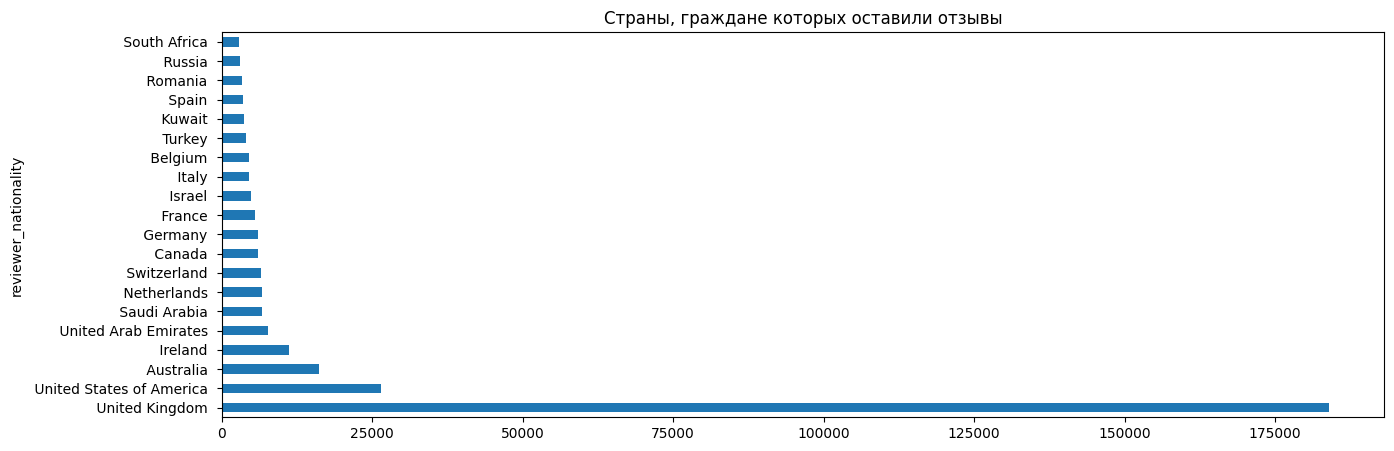

In [438]:
# Внесём в переменную nationalities топ-20 стран по количеству рецензентов.
nationalities = hotels['reviewer_nationality'].value_counts().head(20)
# Отобразим полученную информацию в столбчатой диаграмме:
nationalities.plot(x = 'reviewer_nationality', figsize = (15, 5), kind = 'barh', title = 'Страны, граждане которых оставили отзывы')

Исходя из полученной информации, можно сделать следующие выводы:
1. В таблице представлены все части света.
2. Подавляющее большинство рецензентов из Великобритании.

Таким образом, всех рецензентов, можно разбить по регионам их проживания, а граждан Великобритании следует занести в отдельную категорию. Впрочем, будем действовать поступательно. Вначале разобьём все страны по частям света. Для получения списка стран по частям света воспользуемся данными "Википедии". Воспользуемся библиотеками requests и BeautifulSoup для парсинга данного сайта.

In [439]:
url = 'https://simple.wikipedia.org/wiki/List_of_European_countries' # Определяем значение URL страницы для запроса
response = requests.get(url) # Делаем GET-запрос к ресурсу и результат ответа сохраняем в переменной response

print(response) # Выводим значение response на экран как объект

print(response.status_code) # Выводим числовое значение response на экран

<Response [200]>
200


Анализ интернет-страницы показывает, что нужный нам список находится под тегом 'td'.

In [440]:
page = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup, указывая html-парсер
links = page.find_all('td') # Ищем все ссылки на странице и сохраняем в переменной links в виде списка
print([link.text for link in links]) # Выводим на экран полученный список

[' Albania\n', '28,748\n', '2,994,667\n', '104.1\n', 'Tirana\n', ' Andorra\n', '468\n', '84,082\n', '146.2\n', 'Andorra la Vella\n', ' Austria\n', '83,858\n', '8,217,280\n', '97.9\n', 'Vienna\n', ' Belarus\n', '207,600\n', '9,434,000\n', '45.4\n', 'Minsk\n', ' Belgium\n', '30,510\n', '10,431,477\n', '341.9\n', 'Brussels\n', ' Bosnia and Herzegovina\n', '51,129\n', '3,890,000\n', '76.0\n', 'Sarajevo\n', ' Bulgaria\n', '110,910\n', '7,093,635\n', '63.9\n', 'Sofia\n', ' Croatia\n', '56,542\n', '4,290,612\n', '75.8\n', 'Zagreb\n', ' Cyprus\n', '9,251\n', '838,897\n', '117.0\n', 'Nicosia\n', ' Czechia\n', '78,866\n', '10,190,213\n', '129.2\n', 'Prague\n', ' Denmark\n', '43,094\n', '5,529,888\n', '128.3\n', 'Copenhagen\n', ' Estonia\n', '45,226\n', '1,282,963\n', '28.3\n', 'Tallinn\n', ' Finland\n', '336,593\n', '5,259,250\n', '15.6\n', 'Helsinki\n', ' France\n', '547,030\n', '63,248,000\n', '115.6\n', 'Paris\n', ' Germany\n', '357,021\n', '81,440,000\n', '228.1\n', 'Berlin\n', ' Georgia[1]\

Как можно заметить, названия стран находятся в каждом пятом элементе списка, начиная с нулевого. Кроме того, в список к названиям стран "прицепился" лишний символ и пробел слева. Избавимся от них.

In [441]:
# Создадим список с европейскими странами, взяв из исходного списка
# каждый пятый элемент:
europian_countries = [link.text for link in links][0::5]

# Очистим полученные элементы списка от лишнего символа справа и пробела слева:
k = 0
while k < len(europian_countries):
    europian_countries[k] = europian_countries[k][:-1].lstrip()
    k += 1
    
# Сразу удалим из списка Великобританию (она будет в отдельной категории),
# Турцию и Грузию (они будут в списке азиатских стран)
europian_countries.remove('United Kingdom')
europian_countries.remove('Turkey')
europian_countries.remove('Georgia[1]')

# Выведем на экран полученный список:
europian_countries

['Albania',
 'Andorra',
 'Austria',
 'Belarus',
 'Belgium',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Italy',
 'Latvia',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Moldova',
 'Monaco',
 'Montenegro',
 'Netherlands',
 'North Macedonia',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'San Marino',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Ukraine',
 'Vatican City']

Список европейских стран получен. Понимаю, что отнесение Турции и Грузии к азиатским странам - спорное решение, но мы руководствовались в вопросе разделения Евразии на Европу и Азию "Википедией" (https://ru.wikipedia.org/wiki/Граница_между_Европой_и_Азией).

Повторим проведённые выше процедуры с другими частями света.

In [442]:
url = 'https://en.wikipedia.org/wiki/List_of_Asian_countries_by_area' 
response = requests.get(url)
print(response) 
print(response.status_code) 

<Response [200]>
200


In [443]:
page = BeautifulSoup(response.text, 'html.parser') 
links = page.find_all('td') 
print([link.text for link in links])

['1', '\xa0Russia', '29.3%', '13,083,100 (5,051,400)', '[a]\n', '2', '\xa0China', '21.5%', '9,596,961 (3,705,407)', '[b]\n', '3', '\xa0India', '7.4%', '3,287,263 (1,269,219)', '\n', '4', '\xa0Kazakhstan', '5.8%', '2,600,000 (1,000,000)', '[c]\n', '5', '\xa0Saudi Arabia', '4.8%', '2,149,690 (830,000)', '\n', '6', '\xa0Iran', '3.7%', '1,648,195 (636,372)', '\n', '7', '\xa0Mongolia', '3.5%', '1,564,110 (603,910)', '\n', '8', '\xa0Indonesia', '3.3%', '1,488,509 (574,717)', '[d]\n', '9', '\xa0Pakistan', '2.0%', '881,913 (340,509)', '\n', '10', '\xa0Turkey', '1.7%', '759,805 (293,362)', '[e]\n', '11', '\xa0Myanmar', '1.5%', '676,578 (261,228)', '\n', '12', '\xa0Afghanistan', '1.5%', '652,867 (252,073)', '\n', '13', '\xa0Yemen', '1.2%', '555,000 (214,000)', '\n', '14', '\xa0Thailand', '1.2%', '513,120 (198,120)', '\n', '15', '\xa0Turkmenistan', '1.1%', '488,100 (188,500)', '\n', '16', '\xa0Uzbekistan', '1.0%', '447,400 (172,700)', '\n', '17', '\xa0Iraq', '1.0%', '438,317 (169,235)', '\n', '18

Здесь и далее в работе мы столкнулись с тем, что в исходном списке под нулевым индексом появляется лишний элемент, а к названиям стран прицепляются лишние символы уже слева. Поэтому алгоритм обработки спарсенных списков будет несколько другим.

In [444]:
# Создаём список азиатских стран
asian_countries = [link.text for link in links]
# Очищаем список от нулевого элемента:
asian_countries = asian_countries[1:]
# Прореживаем список каждым пятым элементом
asian_countries = asian_countries[::5]
# Очищаем список от "прицепившихся" к нему лишних элементов в конце:
asian_countries = asian_countries[:-3]

# Очищаем названия стран от лишнего символа слева:
k = 0
while k < len(asian_countries):
    asian_countries[k] = asian_countries[k][1:]
    k += 1

# Удаляем из списка Россию и Кипр (они в европейском списке):
asian_countries.remove('Russia')
asian_countries.remove('Cyprus')

# Удаляем приписку (China) от названий Гонконга и Макао,
# поскольку её нет в нашем столбце reviewer_nationality:
asian_countries[-5] = asian_countries[-5][:9]
asian_countries[-1] = asian_countries[-1][:5]

# Выводим на экран список азиатских стран:
asian_countries

['China',
 'India',
 'Kazakhstan',
 'Saudi Arabia',
 'Iran',
 'Mongolia',
 'Indonesia',
 'Pakistan',
 'Turkey',
 'Myanmar',
 'Afghanistan',
 'Yemen',
 'Thailand',
 'Turkmenistan',
 'Uzbekistan',
 'Iraq',
 'Japan',
 'Vietnam',
 'Malaysia',
 'Oman',
 'Philippines',
 'Laos',
 'Kyrgyzstan',
 'Syria',
 'Cambodia',
 'Bangladesh',
 'Nepal',
 'Tajikistan',
 'North Korea',
 'South Korea',
 'Jordan',
 'United Arab Emirates',
 'Azerbaijan',
 'Georgia',
 'Sri Lanka',
 'Egypt',
 'Bhutan',
 'Taiwan',
 'Armenia',
 'Israel',
 'Kuwait',
 'East Timor',
 'Qatar',
 'Lebanon',
 'Palestine',
 'Brunei',
 'Hong Kong',
 'Bahrain',
 'Singapore',
 'Maldives',
 'Macao']

Получаем список африканских стран.

In [445]:
url = 'https://en.wikipedia.org/wiki/List_of_African_countries_by_area'
response = requests.get(url) 
print(response) 
print(response.status_code) 

<Response [200]>
200


In [446]:
page = BeautifulSoup(response.text, 'html.parser') 
links = page.find_all('td') 
african_countries = [link.text for link in links]

# Очищаем спарсенный список от лишних элементов в начале и конце:
african_countries = african_countries[1:]
african_countries = african_countries[:-15]
# Прореживаем:
african_countries = african_countries[::5]

# Очищаем названия стран:
k = 0
while k < len(african_countries):
    african_countries[k] = african_countries[k][1:]
    k += 1
    
african_countries

['Algeria',
 'DR Congo',
 'Sudan',
 'Libya',
 'Chad',
 'Niger',
 'Angola',
 'Mali',
 'South Africa',
 'Ethiopia',
 'Mauritania',
 'Tanzania',
 'Egypt',
 'Nigeria',
 'Namibia',
 'Mozambique',
 'Zambia',
 'South Sudan',
 'Somalia',
 'Central African Republic',
 'Madagascar',
 'Botswana',
 'Kenya',
 'Cameroon',
 'Morocco',
 'Zimbabwe',
 'Congo',
 'Ivory Coast',
 'Burkina Faso',
 'Gabon',
 'Western Sahara',
 'Guinea',
 'Uganda',
 'Ghana',
 'Senegal',
 'Tunisia',
 'Malawi',
 'Eritrea',
 'Benin',
 'Liberia',
 'Sierra Leone',
 'Togo',
 'Guinea-Bissau',
 'Lesotho',
 'Equatorial Guinea',
 'Burundi',
 'Rwanda',
 'Djibouti',
 'Eswatini',
 'Gambia',
 'Cape Verde',
 'Mauritius',
 'Comoros',
 'São Tomé and Príncipe',
 'Seychelles']

Получаем список североамериканских стран.

In [447]:
url = 'https://en.wikipedia.org/wiki/List_of_North_American_countries_by_area' 
response = requests.get(url) 
print(response) 
print(response.status_code) 

<Response [200]>
200


In [448]:
page = BeautifulSoup(response.text, 'html.parser') 
links = page.find_all('td')
na_countries = [link.text for link in links]
# Очищаем спарсенный список от лишних элементов в начале:
na_countries = na_countries[1:]
# Прореживаем:
na_countries = na_countries[::5]

# Очищаем названия стран:
k = 0
while k < len(na_countries):
    na_countries[k] = na_countries[k][1:]
    na_countries[k] = na_countries[k].split(' (')
    na_countries[k] = na_countries[k][0]
    k += 1
    
# Очищаем полученный список от лишних элементов в конце:
na_countries = na_countries[:-4]

# Удаляем США и Канаду из списка:
na_countries.remove('Canada')
na_countries.remove('United States')

na_countries

['Greenland',
 'Mexico',
 'Nicaragua',
 'Honduras',
 'Cuba',
 'Guatemala',
 'Panama',
 'Costa Rica',
 'Dominican Republic',
 'Haiti',
 'Belize',
 'El Salvador',
 'Bahamas',
 'Jamaica',
 'Puerto Rico',
 'Trinidad and Tobago',
 'Guadeloupe',
 'Martinique',
 'Turks and Caicos Islands',
 'Dominica',
 'Saint Lucia',
 'Curaçao',
 'Antigua and Barbuda',
 'Barbados',
 'Saint Vincent and the Grenadines',
 'US Virgin Islands',
 'Grenada',
 'Caribbean Netherlands',
 'Cayman Islands',
 'Saint Kitts and Nevis',
 'Saint Pierre and Miquelon',
 'Aruba',
 'British Virgin Islands',
 'Montserrat',
 'Anguilla',
 'Bermuda',
 'Saint Martin',
 'Sint Maarten',
 'Saint Barthélemy',
 'Clipperton Island']

Из нашего графика 'Страны, граждане которых оставили отзывы' видно, что количество рецензентов из США и Канады значительно превышает количество граждан из других американских стран. Поэтому мы приняли решение занести США и Канаду в отдельную категорию, а прочие американские страны объединить в одну категорию. Поэтому мы удалили США и Канаду из списка na_countries.

Получаем список южноамериканских стран.

In [449]:
url = 'https://en.wikipedia.org/wiki/List_of_South_American_countries_by_area' 
response = requests.get(url)
print(response) 
print(response.status_code) 

<Response [200]>
200


In [450]:
page = BeautifulSoup(response.text, 'html.parser') 
links = page.find_all('td')
sa_countries = [link.text for link in links]
# Очищаем спарсенный список от лишних элементов в начале:
sa_countries = sa_countries[1:]
# Прореживаем:
sa_countries = sa_countries[::5]

# Очищаем названия стран:
k = 0
while k < len(sa_countries):
    sa_countries[k] = sa_countries[k][1:]
    sa_countries[k] = sa_countries[k].split(' (')
    sa_countries[k] = sa_countries[k][0]
    k += 1
    
# Очищаем полученный список от лишних элементов в конце:
sa_countries = sa_countries[:-3]
  
sa_countries

['Brazil',
 'Argentina',
 'Peru',
 'Colombia',
 'Bolivia',
 'Venezuela',
 'Chile',
 'Paraguay',
 'Ecuador',
 'Guyana',
 'Uruguay',
 'Suriname',
 'French Guiana',
 'Falkland Islands']

Объединяем североамериканские и южноамериканские страны в один список.

In [451]:
american_countries = na_countries + sa_countries
american_countries

['Greenland',
 'Mexico',
 'Nicaragua',
 'Honduras',
 'Cuba',
 'Guatemala',
 'Panama',
 'Costa Rica',
 'Dominican Republic',
 'Haiti',
 'Belize',
 'El Salvador',
 'Bahamas',
 'Jamaica',
 'Puerto Rico',
 'Trinidad and Tobago',
 'Guadeloupe',
 'Martinique',
 'Turks and Caicos Islands',
 'Dominica',
 'Saint Lucia',
 'Curaçao',
 'Antigua and Barbuda',
 'Barbados',
 'Saint Vincent and the Grenadines',
 'US Virgin Islands',
 'Grenada',
 'Caribbean Netherlands',
 'Cayman Islands',
 'Saint Kitts and Nevis',
 'Saint Pierre and Miquelon',
 'Aruba',
 'British Virgin Islands',
 'Montserrat',
 'Anguilla',
 'Bermuda',
 'Saint Martin',
 'Sint Maarten',
 'Saint Barthélemy',
 'Clipperton Island',
 'Brazil',
 'Argentina',
 'Peru',
 'Colombia',
 'Bolivia',
 'Venezuela',
 'Chile',
 'Paraguay',
 'Ecuador',
 'Guyana',
 'Uruguay',
 'Suriname',
 'French Guiana',
 'Falkland Islands']

Получаем список стран Океании. Из него сразу удалим Австралию и Нов. Зеландию, которые тоже занесём в отдельную категорию.

In [452]:
url = 'https://en.wikipedia.org/wiki/List_of_Oceanian_countries_by_area' 
response = requests.get(url) 
print(response)
print(response.status_code) 

<Response [200]>
200


In [453]:
page = BeautifulSoup(response.text, 'html.parser') 
links = page.find_all('td')
oceania_countries = [link.text for link in links]
# Очищаем спарсенный список от лишних элементов в начале:
oceania_countries = oceania_countries[1:]
# Прореживаем:
oceania_countries = oceania_countries[::5]

# Очищаем названия стран:
k = 0
while k < len(oceania_countries):
    oceania_countries[k] = oceania_countries[k][1:]
    oceania_countries[k] = oceania_countries[k].split(' (')
    oceania_countries[k] = oceania_countries[k][0]
    k += 1
    
# Очищаем полученный список от лишних элементов в конце:
oceania_countries = oceania_countries[:-4] 
 
# Удаляем Австралию и Нов. Зеландию из списка:
oceania_countries.remove('Australia')
oceania_countries.remove('New Zealand')

oceania_countries

['Papua New Guinea',
 'Western New Guinea',
 'Solomon Islands',
 'New Caledonia',
 'Fiji',
 'Vanuatu',
 'Hawaii',
 'French Polynesia',
 'Samoa',
 'Tonga',
 'Kiribati',
 'Micronesia',
 'Guam',
 'Palau',
 'Northern Mariana Islands',
 'Niue',
 'Cook Islands',
 'American Samoa',
 'Marshall Islands',
 'Easter Island',
 'Wallis and Futuna',
 'Christmas Island',
 'Norfolk Island',
 'Tuvalu',
 'Nauru',
 'Cocos',
 'Tokelau',
 'Pitcairn Islands']

Итак, списки всех стран созданы. Проверим, все ли страны, указанные в таблице, вошли в наши списки стран.

In [454]:
# Очистим записи в столбце reviewer_nationality от пробелов:
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].apply(lambda x: x.strip())

# Создадим список уникальных стран, входящих в нашу таблицу:
all_nationalities = set(hotels['reviewer_nationality'])
all_nationalities = list(all_nationalities)

# Создадим объединённый список всех стран, спарсенных нами из "Википедии":
all_countries = asian_countries + europian_countries + african_countries + american_countries + oceania_countries

# Создадим пустой список, в который будем вносить названия стран,
# которые есть в таблице, но которых нет в объединённом списке:
rest_countries = []

# Заполним список rest_countries:
for elem in all_nationalities:
    if elem not in all_countries:
        rest_countries.append(elem)
    else:
        None
        
# Выводим список на экран:
rest_countries

['',
 'Falkland Islands Malvinas',
 'Jersey',
 'U S Virgin Islands',
 'Crimea',
 'Central Africa Republic',
 'Turks Caicos Islands',
 'Bonaire St Eustatius and Saba',
 'United Kingdom',
 'St Pierre and Miquelon',
 'Canada',
 'Reunion',
 'United States Minor Outlying Islands',
 'Australia',
 'Isle of Man',
 'Macau',
 'New Zealand',
 'Guernsey',
 'Saint Barts',
 'Democratic Republic of the Congo',
 'Antarctica',
 'Abkhazia Georgia',
 'Gibraltar',
 'Antigua Barbuda',
 'United States of America',
 'Cocos K I',
 'Svalbard Jan Mayen',
 'Palestinian Territory',
 'Faroe Islands',
 'Kosovo',
 'St Maarten',
 'Macedonia',
 'Swaziland',
 'Saint Vincent Grenadines',
 'Czech Republic',
 'Cura ao']

Итак, не все страны из "Википедии" есть в нашей таблице. Придётся вводить эти страны вручную.

Введём новый признак reviewer_region. Он будет указывать, из какого региона (части света) был рецензент. В качестве отдельных регионов введём такие, как 'United Kingdom', 'US & Canada', 'Australia & New Zealand', поскольку представители этих стран значительно превышают в количестве представителей прочих стран своей части света.

In [455]:
# Вводим в таблицу новый признак 'reviewer_region':
hotels['reviewer_region'] = hotels['reviewer_nationality'].apply(lambda x:
    'United Kingdom' if x == 'United Kingdom' else
    'US & Canada' if x == 'United States of America' or x == 'Canada' else
    'Australia & New Zealand' if x == 'Australia' or x == 'New Zealand' else
    'Europe' if x in europian_countries
        or x == 'Czech Republic'
        or x == 'Jersey'
        or x == 'Guernsey'
        or x == 'Isle of Man'
        or x == 'Gibraltar'
        or x == 'Macedonia'
        or x == 'Kosovo'
        or x == 'Faroe Islands'
        or x == 'Crimea'
        or x == 'Svalbard Jan Mayen' else
    'Asia' if x in asian_countries
        or x == 'Abkhazia Georgia'
        or x == 'Macau'
        or x == 'Palestinian Territory'
        or x == 'Cocos K I' else
    'Africa' if x in african_countries 
        or x == 'Swaziland'
        or x == 'Democratic Republic of the Congo'
        or x == 'Reunion'
        or x == 'Central Africa Republic' else
    'America' if x in american_countries 
        or x == 'Cura ao'
        or x == 'Turks Caicos Islands'
        or x == 'Antigua Barbuda'
        or x == 'U S Virgin Islands'
        or x == 'St Maarten'
        or x == 'Falkland Islands Malvinas'
        or x == 'Saint Vincent Grenadines'
        or x == 'Bonaire St Eustatius and Saba'
        or x == 'Saint Barts'
        or x == 'St Pierre and Miquelon' else
    'Oceania' if x in oceania_countries
        or x == 'United States Minor Outlying Islands' else
    'other')

# Выводим результат на экран:
hotels.head()

,additional_number_of_scoring,review_date,average_score,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,London,Barcelona,Paris,Amsterdam,Vienna,Milan,reviewer_region
0,581,1,8.4,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",3,0,0,0,0,0,United Kingdom
1,299,1,8.3,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",2,0,0,0,0,0,United Kingdom
2,32,2,8.9,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",0,0,1,0,0,0,Asia
3,34,3,7.5,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",0,0,1,0,0,0,United Kingdom
4,914,2,8.5,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",0,0,0,1,0,0,Europe


In [456]:
# Проверяем нововведённый признак на наличие пропусков:
hotels['reviewer_region'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 386496 entries, 0 to 386495
Series name: reviewer_region
Non-Null Count   Dtype 
--------------   ----- 
386496 non-null  object
dtypes: object(1)
memory usage: 2.9+ MB


Весь столбец reviewer_region заполнился данными. Проанализируем их.

<AxesSubplot: title={'center': 'Распределение гостей по регионам'}, xlabel='reviewer_region'>

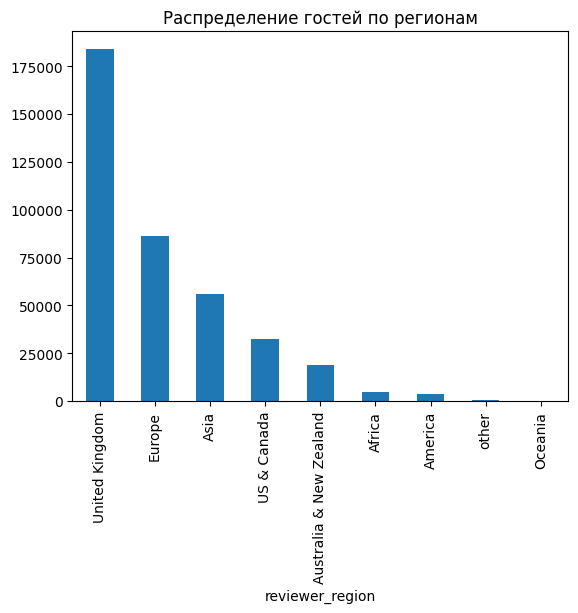

In [457]:
regions = hotels['reviewer_region'].value_counts()
regions.plot(x = 'reviewer_region', kind = 'bar', title = 'Распределение гостей по регионам')

Мы видим, что доля представителей разных частей света неодинакова. Доля представителей Африки, Америки, Океании и прочих регионов крайне мала. Имеет смысл объединить их в один показатель: "прочие страны".

<AxesSubplot: title={'center': 'Распределение гостей по регионам'}, xlabel='reviewer_region'>

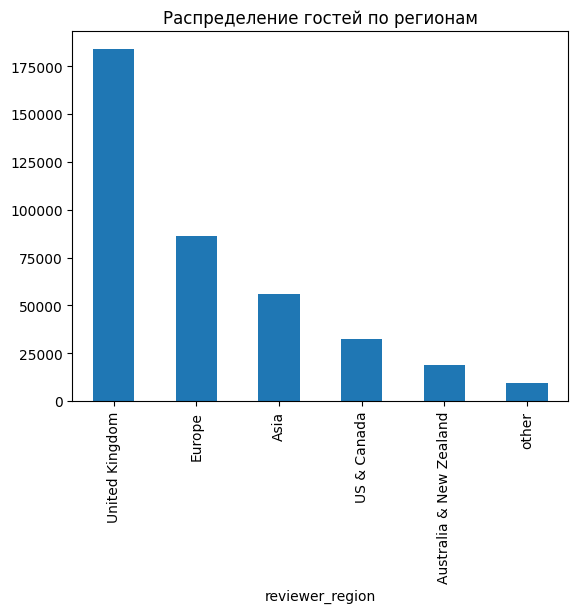

In [458]:
# Объединям показатели Africa, America, Oceania и other
# Остальные оставляем без изменений.
hotels['reviewer_region'] = hotels['reviewer_region'].apply(lambda x:
    x if x == 'United Kingdom' or
    x == 'Europe' or
    x == 'Asia' or
    x == 'US & Canada' or
    x == 'Australia & New Zealand' else
    'other')

# Проверяем результат:
regions = hotels['reviewer_region'].value_counts()
regions.plot(x = 'reviewer_region', kind = 'bar', title = 'Распределение гостей по регионам')

Теперь показатели в признаке reviewer_region более-менее значимы. Можно приступать к его кодировке. Воспользуемся для этого методом OneHotEncoder библиотеки category_encoders.

In [459]:
# Кодируем признак reviewer_region:
encoder = ce.OneHotEncoder(cols = ['reviewer_region'], use_cat_names = True)
type_bin = encoder.fit_transform(hotels['reviewer_region'])
hotels = pd.concat([hotels, type_bin], axis = 1)
hotels.head()

,additional_number_of_scoring,review_date,average_score,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,...,Amsterdam,Vienna,Milan,reviewer_region,reviewer_region_United Kingdom,reviewer_region_Asia,reviewer_region_Europe,reviewer_region_other,reviewer_region_US & Canada,reviewer_region_Australia & New Zealand
0,581,1,8.4,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,...,0,0,0,United Kingdom,1,0,0,0,0,0
1,299,1,8.3,United Kingdom,poor breakfast,3,1361,location,2,14,...,0,0,0,United Kingdom,1,0,0,0,0,0
2,32,2,8.9,China,No kettle in room,6,406,No Positive,0,14,...,0,0,0,Asia,0,1,0,0,0,0
3,34,3,7.5,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,...,0,0,0,United Kingdom,1,0,0,0,0,0
4,914,2,8.5,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,...,1,0,0,Europe,0,0,1,0,0,0


Столбцы reviewer_nationality и reviewer_region больше не нужны, удаляем их.

In [460]:
# Удаляем столбец reviewer_nationality и проверяем результат:
hotels.drop(['reviewer_nationality', 'reviewer_region'], axis = 1, inplace = True)
hotels.head()

,additional_number_of_scoring,review_date,average_score,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,...,Paris,Amsterdam,Vienna,Milan,reviewer_region_United Kingdom,reviewer_region_Asia,reviewer_region_Europe,reviewer_region_other,reviewer_region_US & Canada,reviewer_region_Australia & New Zealand
0,581,1,8.4,Leaving,3,1994,Staff were amazing,4,7,10.0,...,0,0,0,0,1,0,0,0,0,0
1,299,1,8.3,poor breakfast,3,1361,location,2,14,6.3,...,0,0,0,0,1,0,0,0,0,0
2,32,2,8.9,No kettle in room,6,406,No Positive,0,14,7.5,...,1,0,0,0,0,1,0,0,0,0
3,34,3,7.5,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,...,1,0,0,0,1,0,0,0,0,0
4,914,2,8.5,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,...,0,1,0,0,0,0,1,0,0,0


Признак преобразован.

### 3.1.4. Негативный отзыв.

Посмотрим на этот признак.

In [461]:
print(f"Всего уникальных отрицательных отзывов: {hotels['negative_review'].nunique()}")
print(f"Наиболее популярные негативные отзывы: {hotels['negative_review'].value_counts().head(50)}")

Всего уникальных отрицательных отзывов: 248828
Наиболее популярные негативные отзывы: negative_review
No Negative                    95833
 Nothing                       10733
 Nothing                        3152
 nothing                        1658
 N A                             802
 None                            737
                                 606
 N a                             384
 Breakfast                       296
 Small room                      283
 Location                        280
 All good                        251
 Everything                      250
 Nothing really                  239
 none                            223
 nothing                         219
 No complaints                   201
 Nil                             197
 Nothing really                  195
 Price                           192
 n a                             176
 Nothing to dislike              159
 Nothing at all                  154
 Nothing at all                  139
 Small roo

Что бросается в глаза:
1. В список уникальных отзывов попали одинаковые по сути отзывы, записанные рецензентами в разных регистрах. Это нужно исправить.
2. Некоторые пользователи в графе "Отрицательный отзыв" дали положительные по своей сути отзывы ('No Negative', 'Nothing', 'All good' и т.п.). Это такие гости, которые остались всем довольны и ничего отрицательного не нашли. Значимый ли это факт? Вне всякого сомнения! Очевидно, что пользователь, оставшийся всем довольным, даст очень высокую оценку отелю. Можно ли как-то выделить такие отзывы? На наш взгляд, да. Это, как правило, очень короткие отзывы, не более трёх слов. Действительно: если вы остались всем довольны, а вас просят написать, что вас не устроило, вы коротко ответите, что ничего, или что вы всем довольны.

Выделим среди всех отрицательных отзывов те, количество слов в которых не более 3.

In [462]:
# Очищаем записи в столбце negative_review от пробелов:
hotels['negative_review'] = hotels['negative_review'].apply(lambda x: x.strip())

# Приводим все записи в нижний регистр:
hotels['negative_review'] = hotels['negative_review'].apply(lambda x: x.lower())

# Составляем список кратких отзывов и выводим его на экран:
short_negative_reviews = hotels[hotels['review_total_negative_word_counts'] < 4]
short_negative_reviews['negative_review'].value_counts().head(60)

negative_review
no negative            95833
nothing                15874
n a                     1364
none                    1115
                         606
breakfast                396
location                 392
small room               362
everything               329
all good                 297
nothing really           283
price                    260
nil                      259
no complaints            241
na                       205
small rooms              180
leaving                  178
expensive                156
no                       141
staff                    132
room size                132
non                      101
parking                   90
pillows                   88
not much                  82
wifi                      81
expensive breakfast       79
liked everything          75
see above                 75
the price                 73
absolutely nothing        71
no parking                69
bathroom                  68
as above                  6

Проанализируем полученный список и найдём в нём наиболее популярные отзывы, которые являются положительными по своей сути, т.е. так называемое, "положительное в отрицательном".

Далее произведём следующую по своему смыслу работу.

Безусловно, среди постояльцев отелей были те, которые остались чем-то недовольны. Но степень недовольства бывает разной. Некоторых людей неудовлетворили некоторые мелочи, а некоторые были просто в бешенстве ото всего. Оценки таких рецензентов будут ожидаемо различаться, и очень сильно. Мы исходим из того, что степень своего неудовольствия рецензенты как-то отразили в сових отзывах. Оценить степень их недовольства мы попробуем при помощи библиотеки nltk методом SentimentIntensityAnalyzer. Значение показателя 'compound' мы будем принимать за степень недовольства клиента.

In [463]:
# Составляем список "положительного в отрицательном":
positive_in_negative = ['no negative',
                       'nothing',
                       'n a',
                       'none',
                       'all good',
                       'nothing really',
                       'nil',
                       'no complaints',
                       'na',
                       'no'
                       'non',
                       'liked everything',
                       'absolutely nothing',
                       'no thing',
                       'not applicable',
                       'all ok',
                       'nada',
                       'no comment',
                       'no problems',
                       'no negatives']

# Создадим признак 'negative_mesure', который будет отражать
# степень недовольства клиента.
# Сюда мы занесём значение показателя 'compound'
# из метода SentimentIntensityAnalyzer библиотеки nltk.
# Поскольку показатель 'compound' принимает отрицательные значения
# при негативных высказываниях, мы возьмём модуль значения,
# а результат округлим до десятых.
# Если отзыв клиента совпадает со списком positive_in_negative,
# признак 'negative_mesure' будет принимать нулевое значение.
sent_analyzer = SentimentIntensityAnalyzer()
hotels['negative_mesure'] = hotels['negative_review'].apply(
    lambda x: round(abs(sent_analyzer.polarity_scores(x)['compound']), 1) if 
    x not in positive_in_negative 
    else 0)

# Проверяем результат:
hotels['negative_mesure'].value_counts()

negative_mesure
0.0    202906
0.3     31386
0.4     30848
0.5     26187
0.2     21732
0.6     20300
0.7     15989
0.8     13454
0.1     13325
0.9      8794
1.0      1575
Name: count, dtype: int64

Итак, мы создали новый признак, отражающий степень недовольства клиента. Для наглядности визуализируем его.

<AxesSubplot: title={'center': 'Соотношение степеней недовольства клиетов'}, ylabel='count'>

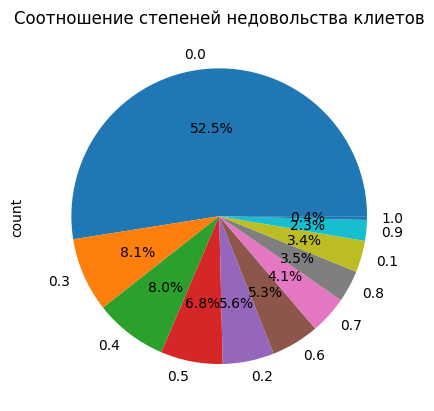

In [464]:
ratio_negative_review = hotels['negative_mesure'].value_counts()
ratio_negative_review.plot(y='negative_mesure', kind='pie', title='Соотношение степеней недовольства клиетов', autopct='%1.1f%%')

На наш взгляд, никакой другой полезной информации из признака 'negative_review' мы извлечь не сможем. Можно его удалить.

In [465]:
hotels.drop(['negative_review'], axis = 1, inplace = True)
hotels.head()

,additional_number_of_scoring,review_date,average_score,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,...,Amsterdam,Vienna,Milan,reviewer_region_United Kingdom,reviewer_region_Asia,reviewer_region_Europe,reviewer_region_other,reviewer_region_US & Canada,reviewer_region_Australia & New Zealand,negative_mesure
0,581,1,8.4,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",...,0,0,0,1,0,0,0,0,0,0.0
1,299,1,8.3,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",...,0,0,0,1,0,0,0,0,0,0.5
2,32,2,8.9,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",...,0,0,0,0,1,0,0,0,0,0.3
3,34,3,7.5,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",...,0,0,0,1,0,0,0,0,0,0.0
4,914,2,8.5,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",...,1,0,0,0,0,1,0,0,0,0.2


Признак преобразован.

### 3.1.5. Положительный отзыв.

Здесь будем кратки: всё,что мы сказали об отрицательных отзывах, на наш взгляд, актуально и для положительных. Поэтому просто скопируем алгоритм работы над предыдущим признаком.

In [466]:
# Очищаем записи в столбце positive_review от пробелов:
hotels['positive_review'] = hotels['positive_review'].apply(lambda x: x.strip())

# Приводим все записи в нижний регистр:
hotels['positive_review'] = hotels['positive_review'].apply(lambda x: x.lower())

# Составляем список кратких отзывов и выводим его на экран:
short_positive_reviews = hotels[hotels['review_total_positive_word_counts'] < 4]
short_positive_reviews['positive_review'].value_counts().head(60)

positive_review
no positive             26863
location                 8831
everything               2453
nothing                  1295
the location             1015
great location            978
good location             887
breakfast                 591
friendly staff            470
staff                     418
excellent location        351
location staff            270
comfy bed                 185
all                       181
clean                     181
the staff                 180
good breakfast            170
perfect location          158
every thing               155
cleanliness               134
                          128
great breakfast           121
comfortable bed           120
position                  116
central location          112
location breakfast        110
excellent breakfast       104
the bed                   103
helpful staff             102
excellent                  97
great staff                94
location only              91
service                 

<AxesSubplot: title={'center': 'Соотношение степеней удовольствия клиетов'}, ylabel='count'>

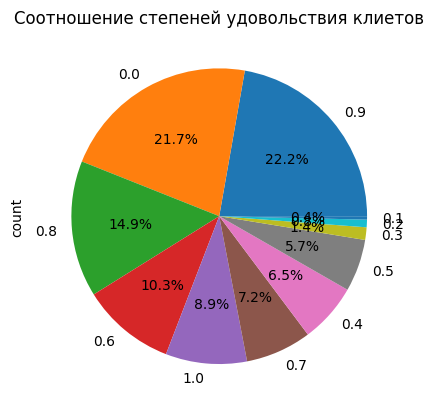

In [467]:
# Составляем список "негативного в позитивном":
negative_in_positive = ['no positive', 'nothing']

# Создадим признак 'positive_mesure' по такому же алгоритму,
# что и 'negative_mesure':
sent_analyzer = SentimentIntensityAnalyzer()
hotels['positive_mesure'] = hotels['positive_review'].apply(
    lambda x: round(abs(sent_analyzer.polarity_scores(x)['compound']), 1) if 
    x not in negative_in_positive 
    else 0)

# Проверяем результат:
ratio_positive_review = hotels['positive_mesure'].value_counts()
ratio_positive_review.plot(y='positive_mesure', kind='pie', title='Соотношение степеней удовольствия клиетов', autopct='%1.1f%%')

In [468]:
# Удаляем признак 'positive_review':
hotels.drop(['positive_review'], axis = 1, inplace = True)
hotels.head()

,additional_number_of_scoring,review_date,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,London,...,Vienna,Milan,reviewer_region_United Kingdom,reviewer_region_Asia,reviewer_region_Europe,reviewer_region_other,reviewer_region_US & Canada,reviewer_region_Australia & New Zealand,negative_mesure,positive_mesure
0,581,1,8.4,3,1994,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",3,...,0,0,1,0,0,0,0,0,0.0,0.6
1,299,1,8.3,3,1361,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",2,...,0,0,1,0,0,0,0,0,0.5,0.0
2,32,2,8.9,6,406,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",0,...,0,0,0,1,0,0,0,0,0.3,0.0
3,34,3,7.5,0,607,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",0,...,0,0,1,0,0,0,0,0,0.0,0.9
4,914,2,8.5,4,7586,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",0,...,0,0,0,0,1,0,0,0,0.2,0.9


Признак преобразован.

### 3.1.6. Тэги.

Посмотрим на этот признак.

In [469]:
print(f"Всего уникальных комбинаций тэгов: {hotels['tags'].nunique()}")
print(f"Наиболее популярные комбинации тэгов: {hotels['tags'].value_counts()}")

Всего уникальных комбинаций тэгов: 47135
Наиболее популярные комбинации тэгов: tags
[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                                                   3853
[' Leisure trip ', ' Couple ', ' Standard Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                                          3673
[' Leisure trip ', ' Couple ', ' Superior Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                                          3274
[' Leisure trip ', ' Couple ', ' Deluxe Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                                            2960
[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 2 nights ', ' Submitted from a mobile device ']                                                  2454
                                                                                                                         

Выводы из увиденного:
1. В столбце представлены комбинации различных тэгов. Их названия повторяются, количество в каждой ячейке различно. В данном виде невозможно ничего понять: сколько у нас уникальных тэгов, сколько их всего. В общем, информацию нужно упорядочить. 
2. Записи нужно очистить от лишних символов.

Всего уникальных тэгов - 2368


<AxesSubplot: title={'center': 'Наиболее популярные тэги'}, ylabel='Tag'>

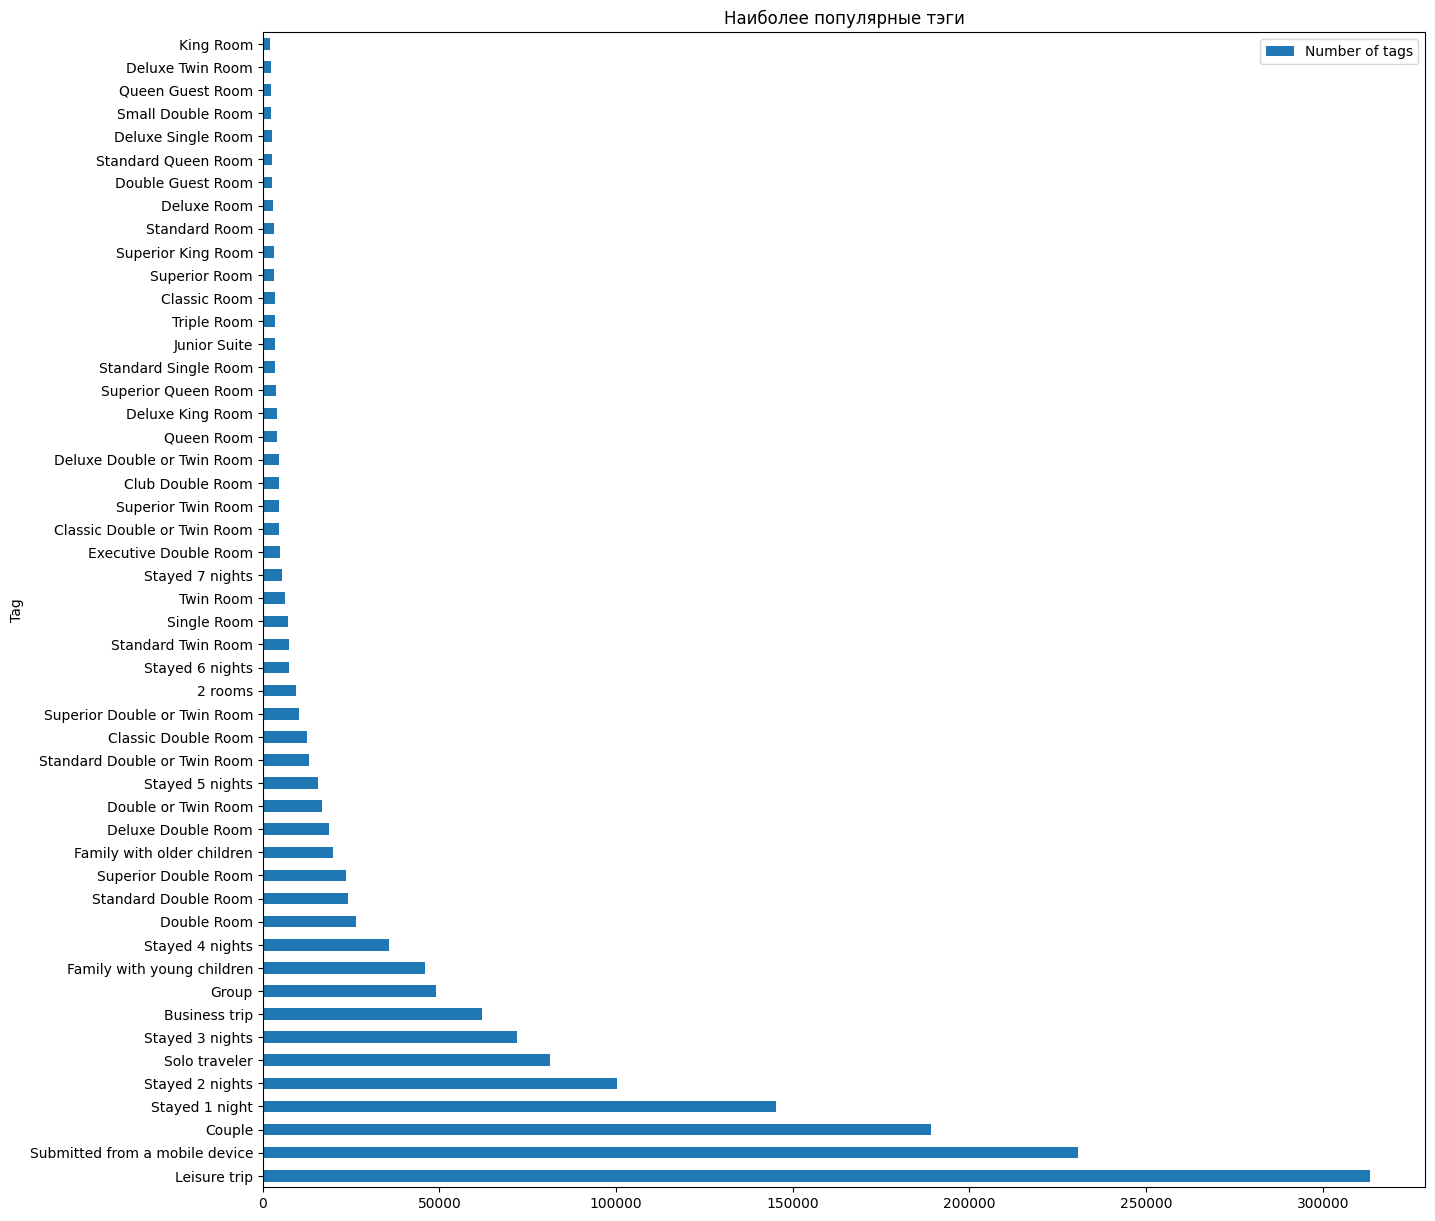

In [470]:
# Очищаем записи в столбце 'tags' от лишних символов:
hotels['tags'] = hotels['tags'].apply(lambda x: x.replace('[', ''))
hotels['tags'] = hotels['tags'].apply(lambda x: x.replace(']', ''))
hotels['tags'] = hotels['tags'].apply(lambda x: x.replace("'", ''))

# Разделяем записи по запятой:
hotels['tags'] = hotels['tags'].apply(lambda x: x.split(','))

# Составляем функцию для очистки записей от пробелов:
def stripping(col):
    result = []
    for elem in col:
        new_elem = elem.strip()
        result.append(new_elem)
    return result

# Применяем функцию к столбцу:
hotels['tags'] = hotels['tags'].apply(stripping)

# Составляем словарь уникальных тэгов:
tags_list = dict()
k = 0
for elem in hotels['tags']:
    for item in elem:
        if item in tags_list:
            tags_list[item] += 1
        else:
            tags_list[item] = 1
            
print(f'Всего уникальных тэгов - {len(tags_list)}')

# Сортируем полученный словарь по убыванию значений:
tags_list = {k: v for k, v in sorted(tags_list.items(), key=lambda item: -item[1])}

# преобразуем словарь в дата-фрейм:
tags_list_df = pd.DataFrame(list(tags_list.items()), columns = ['Tag', 'Number of tags'])

# Визуализируем информацию о наиболее популярных тэгах:
tags_list_df_50 = tags_list_df.head(50)
tags_list_df_50.plot(x = 'Tag', figsize = (15, 15), kind = 'barh', title = 'Наиболее популярные тэги')

Итак, всего у нас 2368 уникальных тэгов. Внимательное их изучение показало, что все их можно объединить в три группы:
1. Цель поездки: отдых ('Leisure trip') или деловая поездка ('Business trip').
2. С кем путешествовал гость: один ('Solo traveler'), со спутником ('Couple'), семья с маленькими детьми ('Family with young children'), семья со взрослыми детьми ('Family with older children') (считаем, что это важно, поскольку у маленьких и взрослых детей совершенно разные потребности), в группе ('Group').
3. На сколько дней останавливался гость в отеле.
4. Уровень комфорта номера, которым пользовался гость: стандартный (Standard или Classic), улучшенный (Deluxe или Superior), представительский (Executive) и люкс (Suite).

Данная информация представляет несомненную ценность, поскольку позволяет сегментировать гостей отелей.

Внесём в нашу таблицу четыре новых признака:
1. 'trip_purpose': продифференцируем рецензентов по цели поездки (1 - 'Leisure trip', 0 - все остальные);
2. 'group': продифференцируем гостей по способу путешествия ('Solo traveler', 'Couple', 'Family with young children', 'Family with older children', 'Group' и 'other');
3. 'duration': продифференцируем гостей по срокам проживания ('1_day', 'to_3_days', 'to_5_days', 'to_7_days', 'over_7_days', 'not_stayed');
4. 'comfort': продифференцируем гостей по уровню комфорта номера (т.е., предположительно, по уролвню дохода): 'standard', 'deluxe', 'executive', 'suite', 'unknown'.

In [471]:
# Внесём в таблицу признак 'trip_purpose':
hotels['trip_purpose'] = hotels['tags'].apply(lambda x: 1 if 'Leisure trip' in x else 0)

# Внесём в таблицу признак 'group':
hotels['group'] = hotels['tags'].apply(lambda x: 'solo_traveler' if 'Solo traveler' in x else
                               'couple' if 'Couple' in x else
                               'family_with_young_children' if 'Family with young children' in x else
                               'family_with_older_children' if 'Family with older children' in x else
                               'group' if 'Group' in x else
                               'other')

# Проверим результат:
hotels.head()

,additional_number_of_scoring,review_date,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,London,...,reviewer_region_United Kingdom,reviewer_region_Asia,reviewer_region_Europe,reviewer_region_other,reviewer_region_US & Canada,reviewer_region_Australia & New Zealand,negative_mesure,positive_mesure,trip_purpose,group
0,581,1,8.4,3,1994,4,7,10.0,"[Leisure trip, Couple, Studio Suite, Stayed 2 ...",3,...,1,0,0,0,0,0,0.0,0.6,1,couple
1,299,1,8.3,3,1361,2,14,6.3,"[Business trip, Couple, Standard Double Room, ...",2,...,1,0,0,0,0,0,0.5,0.0,0,couple
2,32,2,8.9,6,406,0,14,7.5,"[Leisure trip, Solo traveler, Modern Double Ro...",0,...,0,1,0,0,0,0,0.3,0.0,1,solo_traveler
3,34,3,7.5,0,607,11,8,10.0,"[Leisure trip, Solo traveler, Standard Room wi...",0,...,1,0,0,0,0,0,0.0,0.9,1,solo_traveler
4,914,2,8.5,4,7586,20,10,9.6,"[Business trip, Couple, Standard Double or Twi...",0,...,0,0,1,0,0,0,0.2,0.9,0,couple


<AxesSubplot: title={'center': 'Соотношение целей путешествия'}, ylabel='count'>

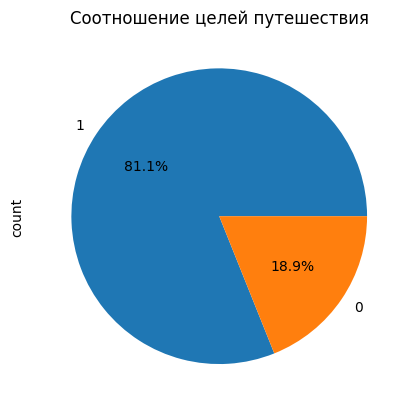

In [472]:
# Визуализируем признак 'trip_purpose':
trip_purpose_pie = hotels['trip_purpose'].value_counts()
trip_purpose_pie.plot(y='trip_purpose', kind='pie', title='Соотношение целей путешествия', autopct='%1.1f%%')

<AxesSubplot: title={'center': 'Соотношение путешественников по количеству спутников'}, ylabel='count'>

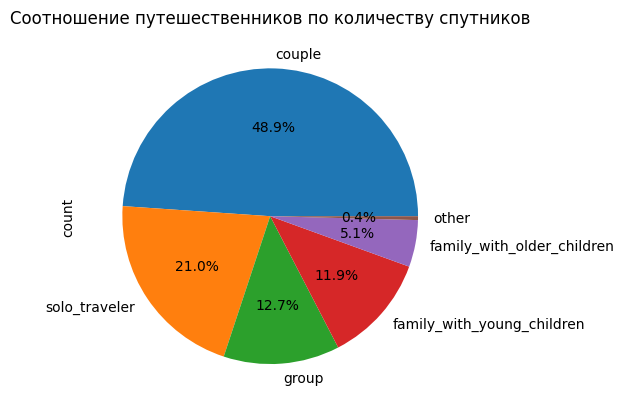

In [473]:
# Визуализируем признак 'group':
group_pie = hotels['group'].value_counts()
group_pie.plot(y='group', kind='pie', title='Соотношение путешественников по количеству спутников', autopct='%1.1f%%')

In [474]:
# Создадим словарь с набором тэгов из столбца 'tags':
tags_dict = dict(hotels['tags'])

# Создадим пустой словарь new_tags_dict, в который будем вносить
# количество дней, которое провёл гость в отеле:
new_tags_dict = dict()
# Заполним пустой словарь при помощи перебора значений в словаре tags_dict:
k = 0
while k < len(tags_dict):
    n = 0
    while n < len(tags_dict[k]):
        if tags_dict[k][n][:6] == 'Stayed':
            new_tags_dict[k] = int(tags_dict[k][n].split(' ')[1])
        else:
            None
        n += 1
    k += 1


# На основе полученного словаря создадим дата-фрейм:
new_tags_dict_df = pd.DataFrame(new_tags_dict.items(), columns = ['index', 'days_stayed'])

# Создадим новый столбец в исходной таблице с названием 'index',
# котрый заполним числами по порядку:
hotels['index'] = np.arange(len(hotels))

# Объединим таблицы hotels и new_tags_dict_df:
hotels = hotels.merge(new_tags_dict_df, how = 'left', on = 'index')

# Удалим временный столбец 'index':
hotels.drop(['index'], axis = 1, inplace = True)

# Пропуски в столбце 'days_stayed' заполним нулями:
hotels['days_stayed'].fillna(0, inplace = True)

# Проверим результат:
hotels['days_stayed'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 386496 entries, 0 to 386495
Series name: days_stayed
Non-Null Count   Dtype  
--------------   -----  
386496 non-null  float64
dtypes: float64(1)
memory usage: 2.9 MB


Итак, мы создали признак 'days_stayed', в который занесли количество дней, которое провёл гость в отеле. Произведём его кодировку по следующей логике: если кол-во дней = 1, значение в признаке будет равно 1, 2-3 дня - 2, 4-5 дней - 3, 6-7 дней - 4, более 7 дней - 5. Если гость не указал кол-во проведённых им дней - 0.

In [475]:
# Приведём значения столбца 'days_stayed' к целочисленным значениям:
hotels['days_stayed'] = hotels['days_stayed'].astype('int64')

# Закодируем столбец:
hotels['days_stayed'] = hotels['days_stayed'].apply(lambda x: 
    1 if x == 1 else
    2 if x == 2 or x == 3 else
    3 if x == 4 or x == 5 else
    4 if x == 6 or x == 7 else
    5 if x > 7 else
    0)

# Проверим результат:
hotels['days_stayed'].value_counts()

days_stayed
2    172116
1    145296
3     51300
4     12929
5      4709
0       146
Name: count, dtype: int64

Остался последний признак 'comfort'. Создадим его и сразу произведём кодировку согласно повышению уровня комфорта номеров, в которых жили гости.

In [476]:
# создадим пустой словарь comfort_dict
comfort_dict = dict()

# Заполним пустой словарь при помощи перебора значений в словаре tags_dict:
k = 0
while k < len(tags_dict):
    n = 0
    while n < len(tags_dict[k]):
        tag_splitted = tags_dict[k][n].split(' ')
        if 'Standard' in tag_splitted or 'Classic' in tag_splitted:
            comfort_dict[k] = 1
        elif 'Deluxe' in tag_splitted or 'Superior' in tag_splitted:
            comfort_dict[k] = 2
        elif 'Executive' in tag_splitted:
            comfort_dict[k] = 3
        elif 'Suite' in tag_splitted:
            comfort_dict[k] = 4
        else:
            None
        n += 1    
    k += 1    

# На основе полученного словаря создадим дата-фрейм:
comfort_dict_df = pd.DataFrame(comfort_dict.items(), columns = ['index', 'comfort'])

# Создадим новый столбец в исходной таблице с названием 'index',
# котрый заполним числами по порядку:
hotels['index'] = np.arange(len(hotels))

# Объединим таблицы hotels и new_tags_dict_df:
hotels = hotels.merge(comfort_dict_df, how = 'left', on = 'index')

# Удалим временный столбец 'index':
hotels.drop(['index'], axis = 1, inplace = True)

# Пропуски в столбце 'days_stayed' заполним нулями:
hotels['comfort'].fillna(0, inplace = True)

# Привдём к целочисленному знвчению:
hotels['comfort'] = hotels['comfort'].astype('int64')

# Проверим результат:
hotels['comfort'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 386496 entries, 0 to 386495
Series name: comfort
Non-Null Count   Dtype
--------------   -----
386496 non-null  int64
dtypes: int64(1)
memory usage: 2.9 MB


На наш взгляд, больше никакой полезной информации из признака 'tags' мы извлечь не сможем, его можно удалить.

In [477]:
hotels.drop(['tags'], axis = 1, inplace = True)
hotels.head()

,additional_number_of_scoring,review_date,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,London,Barcelona,...,reviewer_region_Europe,reviewer_region_other,reviewer_region_US & Canada,reviewer_region_Australia & New Zealand,negative_mesure,positive_mesure,trip_purpose,group,days_stayed,comfort
0,581,1,8.4,3,1994,4,7,10.0,3,0,...,0,0,0,0,0.0,0.6,1,couple,2,4
1,299,1,8.3,3,1361,2,14,6.3,2,0,...,0,0,0,0,0.5,0.0,0,couple,1,1
2,32,2,8.9,6,406,0,14,7.5,0,0,...,0,0,0,0,0.3,0.0,1,solo_traveler,2,0
3,34,3,7.5,0,607,11,8,10.0,0,0,...,0,0,0,0,0.0,0.9,1,solo_traveler,1,1
4,914,2,8.5,4,7586,20,10,9.6,0,0,...,1,0,0,0,0.2,0.9,0,couple,4,1


Теперь нам осталось произвести кодировку признака group. Сделаем это при помощи метода OneHotEncoder.

In [478]:
# Кодируем признак 'group':
encoder = ce.OneHotEncoder(cols = ['group'], use_cat_names = True)
type_bin = encoder.fit_transform(hotels['group'])
hotels = pd.concat([hotels, type_bin], axis = 1)

# Проверяем результат:
hotels.head()

,additional_number_of_scoring,review_date,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,London,Barcelona,...,trip_purpose,group,days_stayed,comfort,group_couple,group_solo_traveler,group_family_with_young_children,group_group,group_family_with_older_children,group_other
0,581,1,8.4,3,1994,4,7,10.0,3,0,...,1,couple,2,4,1,0,0,0,0,0
1,299,1,8.3,3,1361,2,14,6.3,2,0,...,0,couple,1,1,1,0,0,0,0,0
2,32,2,8.9,6,406,0,14,7.5,0,0,...,1,solo_traveler,2,0,0,1,0,0,0,0
3,34,3,7.5,0,607,11,8,10.0,0,0,...,1,solo_traveler,1,1,0,1,0,0,0,0
4,914,2,8.5,4,7586,20,10,9.6,0,0,...,0,couple,4,1,1,0,0,0,0,0


In [479]:
# Удалим лишние признаки из таблицы:
hotels.drop(['group', 'group_other'], axis = 1, inplace = True)
hotels.head()

,additional_number_of_scoring,review_date,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,London,Barcelona,...,negative_mesure,positive_mesure,trip_purpose,days_stayed,comfort,group_couple,group_solo_traveler,group_family_with_young_children,group_group,group_family_with_older_children
0,581,1,8.4,3,1994,4,7,10.0,3,0,...,0.0,0.6,1,2,4,1,0,0,0,0
1,299,1,8.3,3,1361,2,14,6.3,2,0,...,0.5,0.0,0,1,1,1,0,0,0,0
2,32,2,8.9,6,406,0,14,7.5,0,0,...,0.3,0.0,1,2,0,0,1,0,0,0
3,34,3,7.5,0,607,11,8,10.0,0,0,...,0.0,0.9,1,1,1,0,1,0,0,0
4,914,2,8.5,4,7586,20,10,9.6,0,0,...,0.2,0.9,0,4,1,1,0,0,0,0


In [480]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386496 entries, 0 to 386495
Data columns (total 30 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386496 non-null  int64  
 1   review_date                                 386496 non-null  int64  
 2   average_score                               386496 non-null  float64
 3   review_total_negative_word_counts           386496 non-null  int64  
 4   total_number_of_reviews                     386496 non-null  int64  
 5   review_total_positive_word_counts           386496 non-null  int64  
 6   total_number_of_reviews_reviewer_has_given  386496 non-null  int64  
 7   reviewer_score                              386496 non-null  float64
 8   London                                      386496 non-null  int64  
 9   Barcelona                                   386496 non-null  int64  
 

Признак преобразован.

Мы избавились от всех строковых значений.

## <center> 3.2. Числовые значения.

На данном этапе проанализируем все числовые значения в признаках, произведём их стандартизацию или нормализацию при необходимости.

### 3.2.1. Номинальные признаки.

К номинальным признакам у нас относятся: 'additional_number_of_scoring', 'review_total_negative_word_counts', 'total_number_of_reviews', 'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given'. Посмотрим  на их распределение.

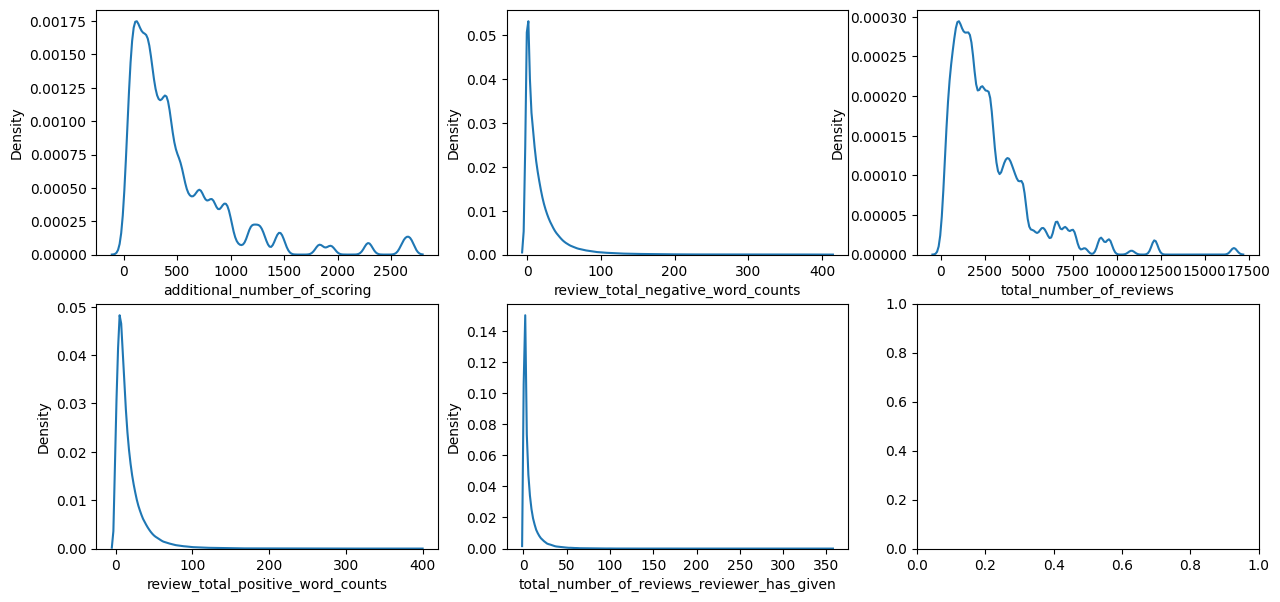

In [481]:
# Готовим координатную плоскость:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (15, 7))

# Посмотрим на графики распределения kde в числовых признаках:
ax1 = sns.kdeplot(hotels['additional_number_of_scoring'], ax=axes[0,0])
ax2 = sns.kdeplot(hotels['review_total_negative_word_counts'], ax=axes[0,1])
ax3 = sns.kdeplot(hotels['total_number_of_reviews'], ax=axes[0,2])
ax4 = sns.kdeplot(hotels['review_total_positive_word_counts'], ax=axes[1,0])
ax5 = sns.kdeplot(hotels['total_number_of_reviews_reviewer_has_given'], ax=axes[1,1])

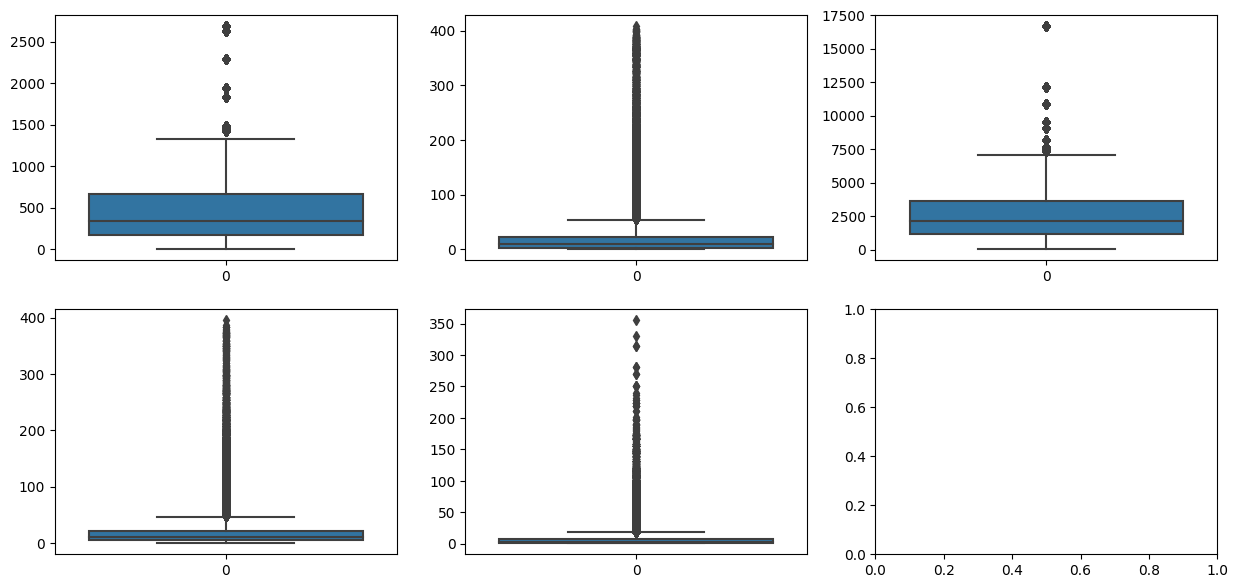

In [482]:
# Теперь построим коробчатые диаграммы для тех же признаков:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (15, 7))

ax1 = sns.boxplot(hotels['additional_number_of_scoring'], ax=axes[0,0])
ax2 = sns.boxplot(hotels['review_total_negative_word_counts'], ax=axes[0,1])
ax3 = sns.boxplot(hotels['total_number_of_reviews'], ax=axes[0,2])
ax4 = sns.boxplot(hotels['review_total_positive_word_counts'], ax=axes[1,0])
ax5 = sns.boxplot(hotels['total_number_of_reviews_reviewer_has_given'], ax=axes[1,1])

Что показали графики:

1. Данные распределены ненормально.
2. В данных много выбросов.

В связи с этим нам необходимо нормализовать наши данные. С учётом большого количества выбросов мы сделаем это при помощи метода RobustScaler библиотеки sklearn.

In [483]:
# Создаём временный дата-фрейм с номинальными числовыми признаками:
temp = hotels[['additional_number_of_scoring',
               'review_total_negative_word_counts',
               'total_number_of_reviews',
               'review_total_positive_word_counts',
               'total_number_of_reviews_reviewer_has_given']].copy()

# Создаём список столбцов таблицы temp:
col_names = list(temp.columns)

# инициализируем нормализатор RobustScaler:
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
temp = r_scaler.fit_transform(temp)

# Преобразуем промежуточный датасет в полноценный датафрейм:
temp = pd.DataFrame(temp, columns=col_names)
# Проверяем результат:
temp.head()

,additional_number_of_scoring,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given
0,0.486762,-0.285714,-0.056634,-0.411765,0.571429
1,-0.087576,-0.285714,-0.312702,-0.529412,1.571429
2,-0.631365,-0.142857,-0.699029,-0.647059,1.571429
3,-0.627291,-0.428571,-0.617718,0.000000,0.714286
4,1.164969,-0.238095,2.205502,0.529412,1.000000


In [484]:
# Переносим данные из временной таблицы в основную:
hotels['additional_number_of_scoring'] = temp['additional_number_of_scoring'].apply(lambda x: x)
hotels['review_total_negative_word_counts'] = temp['review_total_negative_word_counts'].apply(lambda x: x)
hotels['total_number_of_reviews'] = temp['total_number_of_reviews'].apply(lambda x: x)
hotels['review_total_positive_word_counts'] = temp['review_total_positive_word_counts'].apply(lambda x: x)
hotels['total_number_of_reviews_reviewer_has_given'] = temp['total_number_of_reviews_reviewer_has_given'].apply(lambda x: x)
hotels.head()

,additional_number_of_scoring,review_date,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,London,Barcelona,...,negative_mesure,positive_mesure,trip_purpose,days_stayed,comfort,group_couple,group_solo_traveler,group_family_with_young_children,group_group,group_family_with_older_children
0,0.486762,1,8.4,-0.285714,-0.056634,-0.411765,0.571429,10.0,3,0,...,0.0,0.6,1,2,4,1,0,0,0,0
1,-0.087576,1,8.3,-0.285714,-0.312702,-0.529412,1.571429,6.3,2,0,...,0.5,0.0,0,1,1,1,0,0,0,0
2,-0.631365,2,8.9,-0.142857,-0.699029,-0.647059,1.571429,7.5,0,0,...,0.3,0.0,1,2,0,0,1,0,0,0
3,-0.627291,3,7.5,-0.428571,-0.617718,0.000000,0.714286,10.0,0,0,...,0.0,0.9,1,1,1,0,1,0,0,0
4,1.164969,2,8.5,-0.238095,2.205502,0.529412,1.000000,9.6,0,0,...,0.2,0.9,0,4,1,1,0,0,0,0


Числовые номинальные признаки преобразованы.

### 3.2.2. Порядковые признаки.

В нашем датасете есть следующие порядковые признаки: 'review_date', 'London', 'Barcelona', 'Paris', 'Amsterdam', 'Vienna', 'Milan', 'days_stayed', 'comfort'. Сразу бросается в глаза большой разброс максимальных значений в них. Эти признаки необходимо масштабировать.

In [485]:
# Создаём временный дата-фрейм с первыми пятью порядковыми признаками:
temp = hotels[['review_date', 'London', 'Barcelona', 'Paris', 'Amsterdam']].copy()

# Создаём список столбцов таблицы temp:
col_names = list(temp.columns)

# инициализируем нормализатор MinMaxScaler:
mm_scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))

# кодируем исходный датасет
temp = mm_scaler.fit_transform(temp)

# Преобразуем промежуточный датасет в полноценный датафрейм
temp = pd.DataFrame(temp, columns=col_names)

# Переносим данные в исходную таблицу:
hotels['review_date'] = temp['review_date'].apply(lambda x: x)
hotels['London'] = temp['London'].apply(lambda x: x)
hotels['Barcelona'] = temp['Barcelona'].apply(lambda x: x)
hotels['Paris'] = temp['Paris'].apply(lambda x: x)
hotels['Amsterdam'] = temp['Amsterdam'].apply(lambda x: x)

# По аналогичной схеме кодируем остальные порядковые признаки:
temp = hotels[['Vienna', 'Milan', 'days_stayed', 'comfort']].copy()

col_names = list(temp.columns)
mm_scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))

temp = mm_scaler.fit_transform(temp)

temp = pd.DataFrame(temp, columns=col_names)

hotels['Vienna'] = temp['Vienna'].apply(lambda x: x)
hotels['Milan'] = temp['Milan'].apply(lambda x: x)
hotels['days_stayed'] = temp['days_stayed'].apply(lambda x: x)
hotels['comfort'] = temp['comfort'].apply(lambda x: x)
hotels.head()

,additional_number_of_scoring,review_date,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,London,Barcelona,...,negative_mesure,positive_mesure,trip_purpose,days_stayed,comfort,group_couple,group_solo_traveler,group_family_with_young_children,group_group,group_family_with_older_children
0,0.486762,0.000000,8.4,-0.285714,-0.056634,-0.411765,0.571429,10.0,1.000000,0.0,...,0.0,0.6,1,0.4,1.00,1,0,0,0,0
1,-0.087576,0.000000,8.3,-0.285714,-0.312702,-0.529412,1.571429,6.3,0.666667,0.0,...,0.5,0.0,0,0.2,0.25,1,0,0,0,0
2,-0.631365,0.333333,8.9,-0.142857,-0.699029,-0.647059,1.571429,7.5,0.000000,0.0,...,0.3,0.0,1,0.4,0.00,0,1,0,0,0
3,-0.627291,0.666667,7.5,-0.428571,-0.617718,0.000000,0.714286,10.0,0.000000,0.0,...,0.0,0.9,1,0.2,0.25,0,1,0,0,0
4,1.164969,0.333333,8.5,-0.238095,2.205502,0.529412,1.000000,9.6,0.000000,0.0,...,0.2,0.9,0,0.8,0.25,1,0,0,0,0


Порядковые признаки преобразованы.

Теперь можно стандартизировать наши признаки для корректной работы модели. Перед стандартизацией выделим из нашего датасета целевую переменную.

In [486]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х — данные с информацией об отелях, у — целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score']
y = y.astype('int')

# Создаём список столбцов:
col_names = list(X.columns)
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
X = s_scaler.fit_transform(X)

# Преобразуем промежуточный датасет в полноценный датафрейм
X = pd.DataFrame(X, columns=col_names)
X.head()

,additional_number_of_scoring,review_date,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,London,Barcelona,Paris,...,negative_mesure,positive_mesure,trip_purpose,days_stayed,comfort,group_couple,group_solo_traveler,group_family_with_young_children,group_group,group_family_with_older_children
0,0.164871,-1.215088,0.004708,-0.523150,-0.323997,-0.634215,-0.015943,1.538369,-0.333964,-0.316330,...,-0.788929,0.054139,0.483136,0.164007,2.818231,1.021986,-0.515587,-0.366693,-0.381288,-0.232289
1,-0.398718,-1.215088,-0.177821,-0.523150,-0.597203,-0.726276,0.617401,0.709808,-0.333964,-0.316330,...,1.022769,-1.639799,-2.069810,-1.003295,-0.047697,1.021986,-0.515587,-0.366693,-0.381288,-0.232289
2,-0.932329,-0.308805,0.917349,-0.422152,-1.009386,-0.818337,0.617401,-0.947313,-0.333964,1.482037,...,0.298090,-1.639799,0.483136,0.164007,-1.003006,-0.978487,1.939535,-0.366693,-0.381288,-0.232289
3,-0.928332,0.597477,-1.638047,-0.624148,-0.922634,-0.312002,0.074535,-0.947313,-0.333964,1.482037,...,-0.788929,0.901108,0.483136,-1.003295,-0.047697,-0.978487,1.939535,-0.366693,-0.381288,-0.232289
4,0.830386,-0.308805,0.187236,-0.489484,2.089540,0.102272,0.255490,-0.947313,-0.333964,-0.316330,...,-0.064250,0.901108,-2.069810,2.498610,-0.047697,1.021986,-0.515587,-0.366693,-0.381288,-0.232289


Данные преобразованы.

Все задачи третьего этапа выполнены.

# <center> 4. Отбор данных.

Для отбора данных составим тепловую карту корреляции признаков в нашем датасете.

<AxesSubplot: >

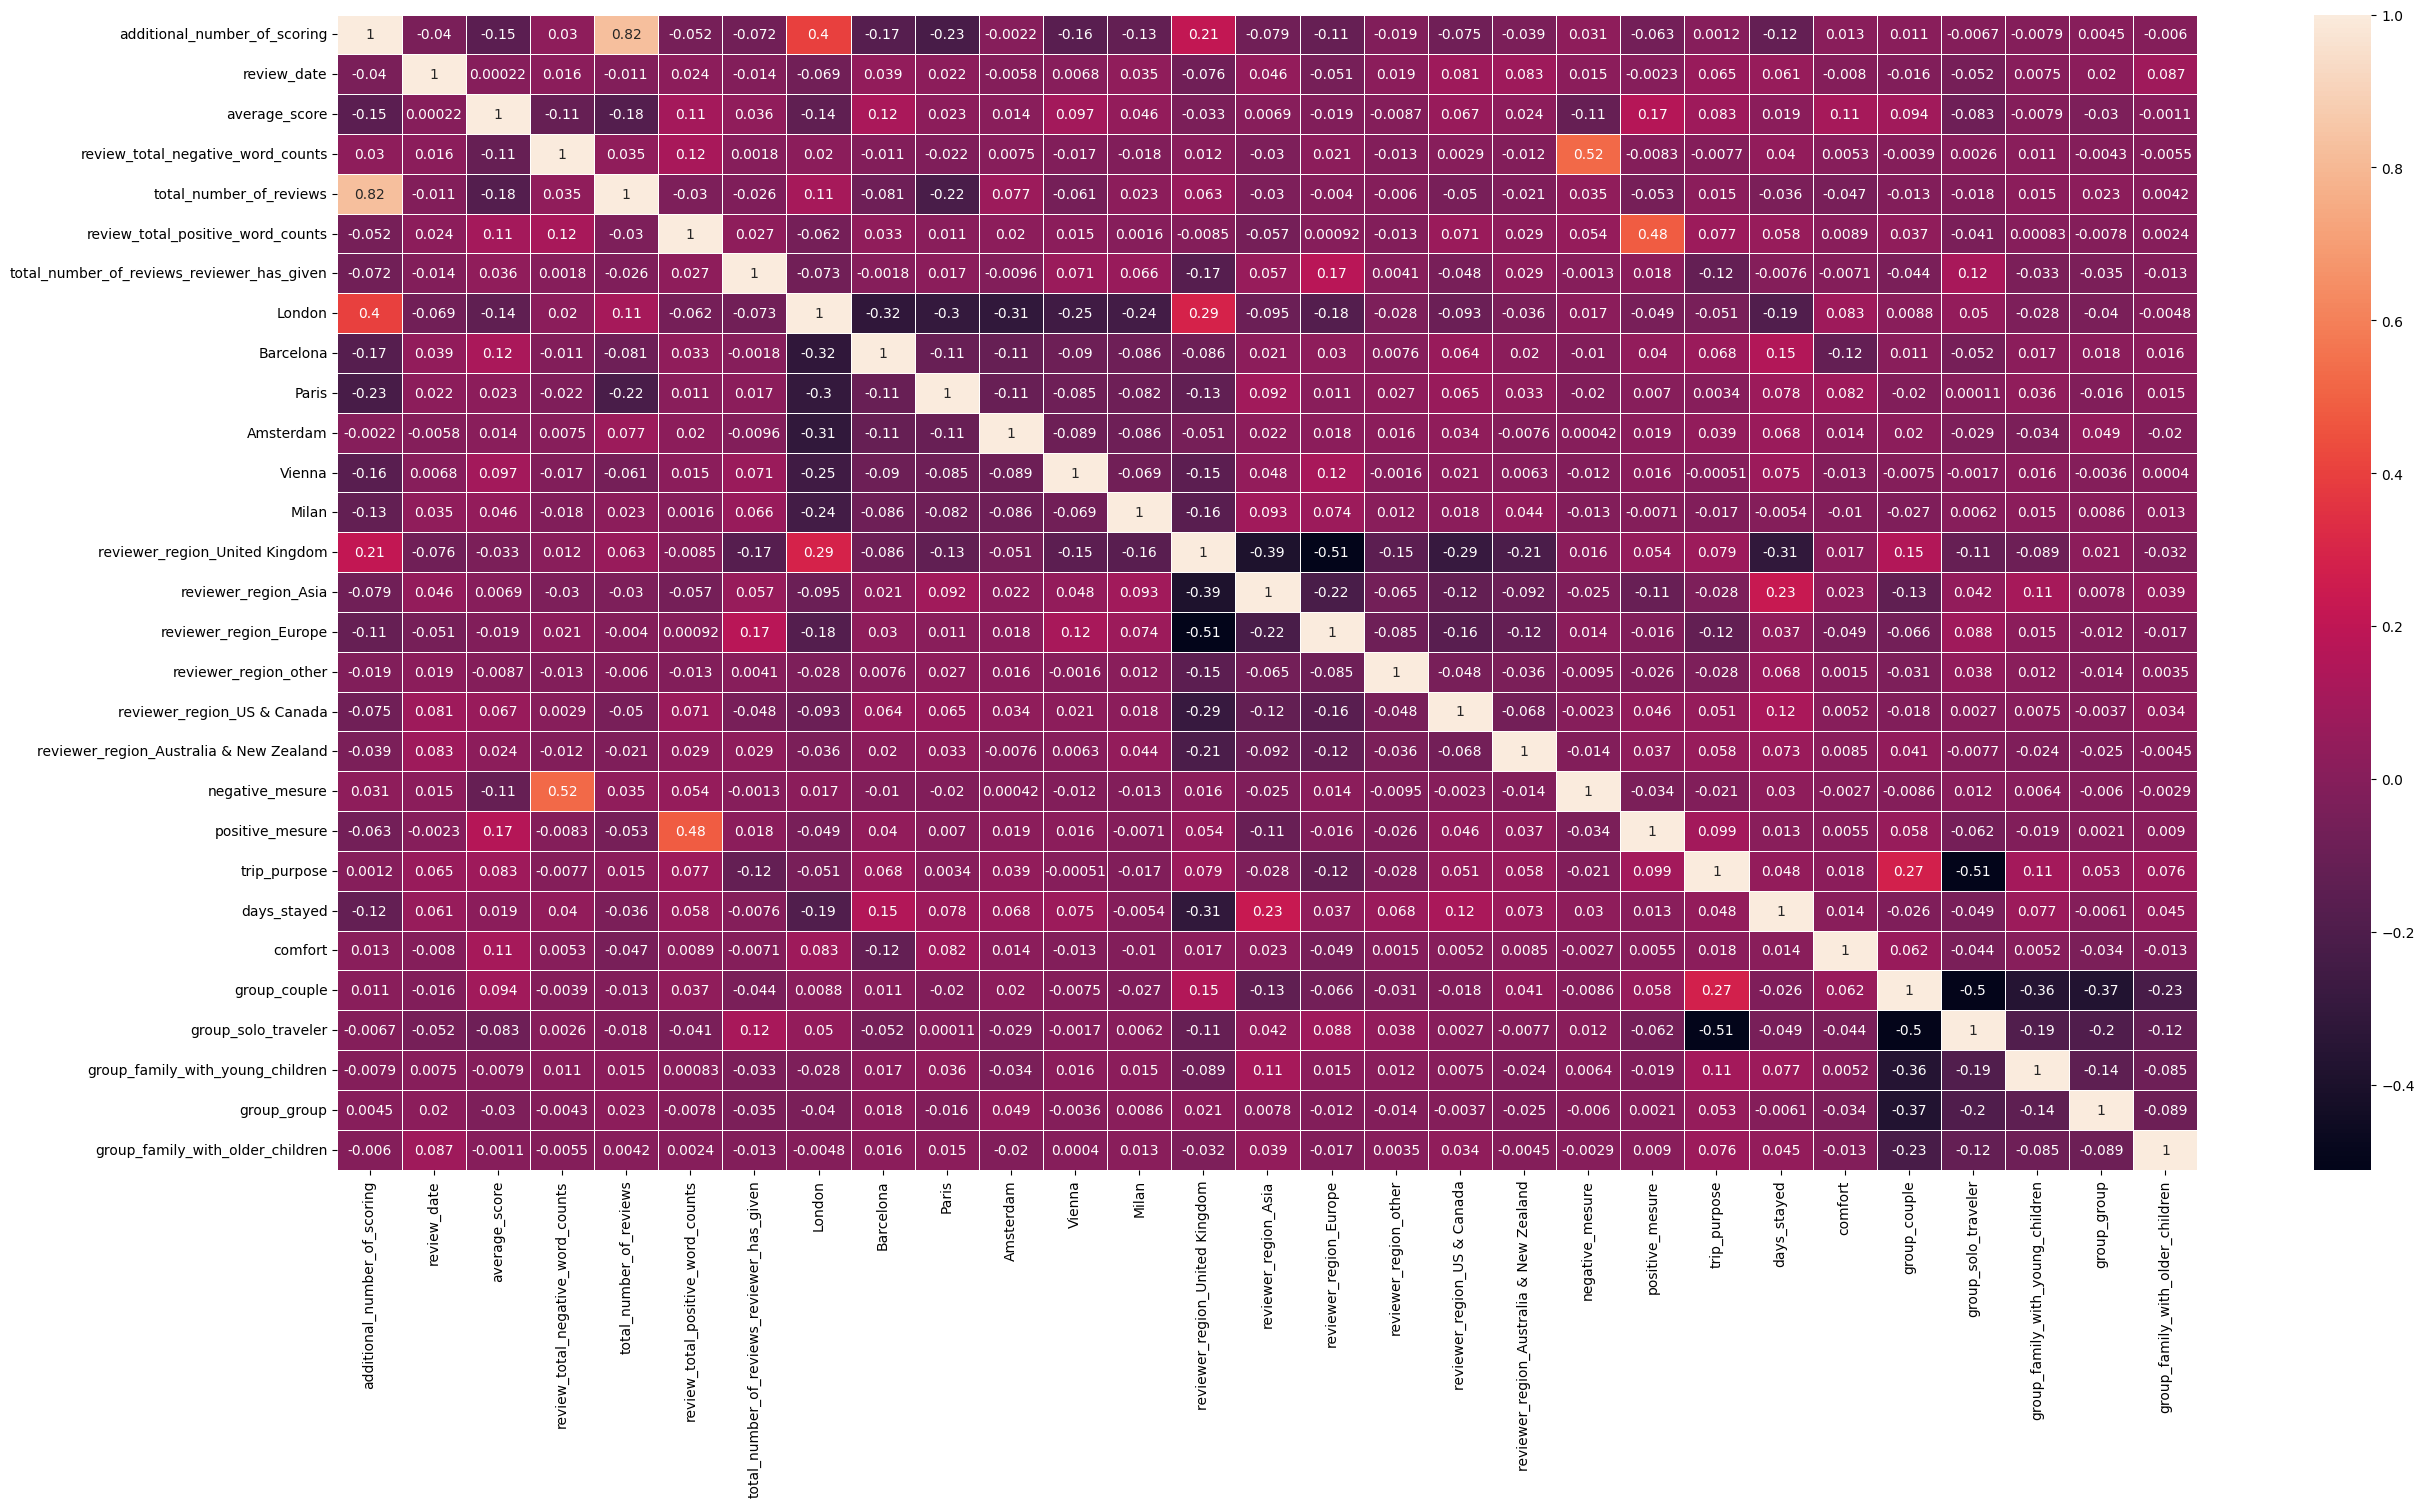

In [487]:
# Составляем тепловую карту корреляции признаков.
fig, ax = plt.subplots(figsize=(30,15))
sns.heatmap(X.corr(), annot=True, linewidths=.5, ax=ax)

Мы обнаружили пару мультиколлинеарных признаков: 'additional_number_of_scoring' и 'total_number_of_reviews'. Выясним, какой из них меньше влияет на целевую переменную. Сделаем это при помощи функции f_classif библиотеки sklearn.

<AxesSubplot: >

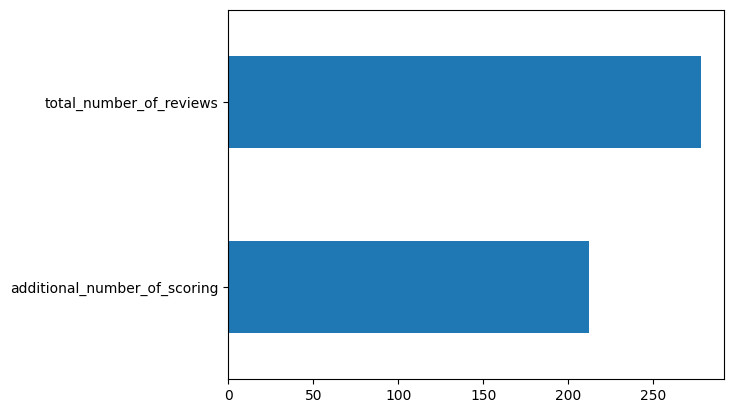

In [488]:
# Создадим список мультиколлинеарных столбцов:
mult_cols = ['additional_number_of_scoring', 'total_number_of_reviews']
# Применим к ним функцию f_classif:
imp_num = pd.Series(f_classif(X[mult_cols], y)[0], index = mult_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

Признак 'additional_number_of_scoring' менее важен. Удалим его из набора данных.

In [489]:
# Удаляем столбец 'additional_number_of_scoring':
X.drop(['additional_number_of_scoring'], axis = 1, inplace = True)
X.head()

,review_date,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,London,Barcelona,Paris,Amsterdam,...,negative_mesure,positive_mesure,trip_purpose,days_stayed,comfort,group_couple,group_solo_traveler,group_family_with_young_children,group_group,group_family_with_older_children
0,-1.215088,0.004708,-0.523150,-0.323997,-0.634215,-0.015943,1.538369,-0.333964,-0.316330,-0.332146,...,-0.788929,0.054139,0.483136,0.164007,2.818231,1.021986,-0.515587,-0.366693,-0.381288,-0.232289
1,-1.215088,-0.177821,-0.523150,-0.597203,-0.726276,0.617401,0.709808,-0.333964,-0.316330,-0.332146,...,1.022769,-1.639799,-2.069810,-1.003295,-0.047697,1.021986,-0.515587,-0.366693,-0.381288,-0.232289
2,-0.308805,0.917349,-0.422152,-1.009386,-0.818337,0.617401,-0.947313,-0.333964,1.482037,-0.332146,...,0.298090,-1.639799,0.483136,0.164007,-1.003006,-0.978487,1.939535,-0.366693,-0.381288,-0.232289
3,0.597477,-1.638047,-0.624148,-0.922634,-0.312002,0.074535,-0.947313,-0.333964,1.482037,-0.332146,...,-0.788929,0.901108,0.483136,-1.003295,-0.047697,-0.978487,1.939535,-0.366693,-0.381288,-0.232289
4,-0.308805,0.187236,-0.489484,2.089540,0.102272,0.255490,-0.947313,-0.333964,-0.316330,1.755018,...,-0.064250,0.901108,-2.069810,2.498610,-0.047697,1.021986,-0.515587,-0.366693,-0.381288,-0.232289


Отбор признаков завершён.

# <center> 5. Создание и обучение модели. Оценка качества модели.

In [490]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)

# Сравниваем предсказанные значения (y_pred) с реальными (y_test), 
# выводим показатель метрики MAPE:  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.15506200905676015


Итак, уровень ошибки предсказанных нами значений оказался равен 15,5%, что является хорошим показателем.

Цель проекта выполнена.